#Chapter one:Documentation





###Defining the analytical question:


> A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training)



###Specifying the data analytic question: 

> Which team between team 1 and team 2 is more likely to Win, Lose or Draw (W, L, D)



###Defining the metric for success:


*   Perform any necessary feature engineering 
*   Check of multicollinearity
*   Start building the model
*   Cross-validate the model
*   Compute RMSE
*   Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
  




###Understanding the context

The new model for calculating the FIFA/Coca-Cola World Ranking (FWR) was developed over two years
during which time a large number of different algorithms was tested and extensively discussed.
Throughout this review and consultation process, the main aim was to identify an algorithm that is not
only intuitive, easy to understand and improves overall accuracy of the formula, but also addresses
feedback received about the previous model and provides fair and equal opportunities for all teams
across all confederations to ascend the FWR.

Therefore the model for Mchezopesa Ltd should also be intuitive, easy to understand  and should improve accuracy of the formula.

### d.) Recording the Experimental Design

  > Here is the breakdown of the process to implement this solution:



1.   Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
2.   Expected flow for the assessment:
* Perform EDA
* Perform any necessary feature engineering 
* Check of multicollinearity
* Start building the model
* Cross-validate the model
* Compute RMSE
* Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test

3.  Perform appropriate regressions on the data including your justification
4. Challenge your solution by providing insights on how you can make improvements.



### Data Relevance

# Chapter Two: Reading and Initial Data Exploration

In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

from sklearn import model_selection

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn import metrics

# We run this to suppress various deprecation warnings from plotnine - keeps our notebook cleaner
import warnings
warnings.filterwarnings('ignore')

print('libraries imported')

libraries imported


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Loading the dataset 

fifa_df = pd.read_csv('fifa_ranking.csv')
print(fifa_df.head())




   rank country_full  ... confederation   rank_date
0     1      Germany  ...          UEFA  1993-08-08
1     2        Italy  ...          UEFA  1993-08-08
2     3  Switzerland  ...          UEFA  1993-08-08
3     4       Sweden  ...          UEFA  1993-08-08
4     5    Argentina  ...      CONMEBOL  1993-08-08

[5 rows x 16 columns]


In [ ]:
res_df = pd.read_csv('results.csv')
print(res_df.head())

         date home_team away_team  ...     city   country neutral
0  1872-11-30  Scotland   England  ...  Glasgow  Scotland   False
1  1873-03-08   England  Scotland  ...   London   England   False
2  1874-03-07  Scotland   England  ...  Glasgow  Scotland   False
3  1875-03-06   England  Scotland  ...   London   England   False
4  1876-03-04  Scotland   England  ...  Glasgow  Scotland   False

[5 rows x 9 columns]


### Checking the packaging of the dataset


In [ ]:
#Previewing the fifa dataset 
fifa_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
#Preveiwing the bottom rows of the fifa dataset

fifa_df.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
#Checking the columns in the fifa dataset

fifa_df.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [ ]:
#checking the size of our dataset
s = fifa_df.shape

print('The dataset contains', s[0], 'no. of rows and',s[1], 'no. of columns')

The dataset contains 57793 no. of rows and 16 no. of columns


In [ ]:
#checking if our columns have appropriate datatypes
fifa_df.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [ ]:
#checking for null values 
fifa_df.isnull().values.any()

False

In [ ]:
#Checking the description of dispersion and central tendancy of the data
fifa_df.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [ ]:
#Checking for unique observation in the variables


fifa_df.nunique()

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64

In [ ]:
#Previewing the first five results dataset
res_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
#Previewing the last five results in the dataset

res_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


The data contains entries from 1872 to 2019

In [ ]:
#Checking out the columns

res_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [ ]:
#checking the size of our dataset
s = res_df.shape

print('The dataset contains', s[0], 'no. of rows and',s[1], 'no. of columns')

The dataset contains 40839 no. of rows and 9 no. of columns


In [ ]:
#Displaying the datatypes of the columns
res_df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [ ]:
#checking for null values 
res_df.isnull().values.any()

False

In [ ]:
#Checking the description of dispersion and central tendancy of the data
res_df.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [ ]:
#Checking for unique observation in the variables
res_df.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64

# Chapter three: Data Cleaning

### validity

In [ ]:
#Checking if variable cur_year_avg and cur_year_avg_weighted are similar

r =(fifa_df['cur_year_avg']==fifa_df['cur_year_avg_weighted'])
r.unique()

array([ True])

This shows that variable cur_year_avg and cur_year_avg_weighted have similar observations

In [ ]:
#Here we will drop unnecessary columns
fifa_df.drop(['country_abrv'], axis = 1, inplace = True)
fifa_df.drop(['cur_year_avg_weighted'], axis = 1, inplace = True)

### Completeness

In [ ]:
#checking for null values 
fifa_df.isnull().values.any()

False

In [ ]:
#checking for null values 
res_df.isnull().values.any()

False

Both dataframes have no null values

### Consistency

In [ ]:
# Checking for duplicates
#
fifa_df.duplicated().any()

True

In [ ]:
#creating a dataframe for duplicate values
#This is to create a visual inorder to see what action we will take
duplicated_df = fifa_df[fifa_df.duplicated()]
duplicated_df

,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
41320,113,Sudan,297.13,304,-1,126.55,219.72,109.86,67.36,20.21,202.53,40.51,CAF,2011-12-21
41536,120,Sudan,264.81,297,-7,129.14,163.12,81.56,40.91,12.27,209.21,41.84,CAF,2012-01-18
41736,111,Sudan,301.67,265,9,156.34,163.12,81.56,40.91,12.27,257.48,51.50,CAF,2012-02-15
41944,110,Sudan,299.75,302,1,156.34,163.12,81.56,46.75,14.03,239.09,47.82,CAF,2012-03-07
42157,113,Sudan,292.03,300,-3,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,2012-04-11
42366,113,Sudan,292.03,292,0,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,2012-05-09
42562,101,Sudan,338.25,292,12,179.70,209.32,104.66,7.08,2.12,258.83,51.77,CAF,2012-06-06
42775,105,Sudan,329.36,338,-4,171.57,229.19,114.60,8.50,2.55,203.22,40.64,CAF,2012-07-04
42983,104,Sudan,329.36,329,1,171.57,229.19,114.60,8.50,2.55,203.22,40.64,CAF,2012-08-08
43193,103,Sudan,331.79,329,1,169.05,187.77,93.88,108.13,32.44,182.11,36.42,CAF,2012-09-05


In [ ]:
#determing the size of the duplicated records
s = duplicated_df.shape

print('The dataset contains', s[0], 'no. of rows and',s[1], 'no. of columns')

The dataset contains 37 no. of rows and 14 no. of columns


From the above code, we will retain the duplicated information since it contains vital data needed to create the model.

In [ ]:
# Checking for duplicates
#
res_df.duplicated().any()

False

### Uniformity

In [ ]:
#checking for data types
#This is to see if the variables have the correct datatypes
fifa_df.dtypes


rank                         int64
country_full                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [ ]:
#Changing the rank_date variable to datetime
fifa_df['rank_date'] =pd.to_datetime(fifa_df['rank_date'])


#Creating a year and month column

fifa_df['year'] = fifa_df.rank_date.dt.year
fifa_df['month'] = fifa_df.rank_date.dt.month

print(fifa_df.dtypes)

rank                                int64
country_full                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
year                                int64
month                               int64
dtype: object


In [ ]:
#checking for data types
#This is to see if the variables have the correct datatypes
res_df.dtypes


date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [ ]:
#Changining date to datetime
res_df['date'] =pd.to_datetime(res_df['date'])


#Creating a year and month column

res_df['year'] = res_df.date.dt.year
res_df['month'] = res_df.date.dt.month

print(res_df.dtypes)

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
year                   int64
month                  int64
dtype: object


In [ ]:
#Combining the two datasets
df_rename = fifa_df.rename(columns={'rank_date':'date'})



In [ ]:
#Creating new dataset

#new_df = pd.merge(df_rename, res_df, on='date', 'year', 'month')
new_df = pd.merge(df_rename, res_df,  how='left', left_on=['date'], right_on = ['date'])
new_df.head(50)

,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,year_x,month_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year_y,month_y
0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,Bolivia,Uruguay,3.0,1.0,FIFA World Cup qualification,La Paz,Bolivia,False,1993.0,8.0
1,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,Brazil,Mexico,1.0,1.0,Friendly,Maceió,Brazil,False,1993.0,8.0
2,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,Ecuador,Venezuela,5.0,0.0,FIFA World Cup qualification,Quito,Ecuador,False,1993.0,8.0
3,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,Guinea,Sierra Leone,1.0,0.0,Friendly,Conakry,Guinea,False,1993.0,8.0
4,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,Paraguay,Argentina,1.0,3.0,FIFA World Cup qualification,Asunción,Paraguay,False,1993.0,8.0
5,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,Peru,Colombia,0.0,1.0,FIFA World Cup qualification,Lima,Peru,False,1993.0,8.0
6,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,Zimbabwe,Eswatini,2.0,0.0,Friendly,Harare,Zimbabwe,False,1993.0,8.0
7,2,Italy,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,Bolivia,Uruguay,3.0,1.0,FIFA World Cup qualification,La Paz,Bolivia,False,1993.0,8.0
8,2,Italy,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,Brazil,Mexico,1.0,1.0,Friendly,Maceió,Brazil,False,1993.0,8.0
9,2,Italy,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,Ecuador,Venezuela,5.0,0.0,FIFA World Cup qualification,Quito,Ecuador,False,1993.0,8.0


In [ ]:
new_df.drop(['year_y', 'month_y'], axis = 1, inplace = True)

new_df.rename(columns={'year_x':'year', 'month_x':'month'}, inplace=True)


In [ ]:
new_df.isnull().sum()

rank                           0
country_full                   0
total_points                   0
previous_points                0
rank_change                    0
cur_year_avg                   0
last_year_avg                  0
last_year_avg_weighted         0
two_year_ago_avg               0
two_year_ago_weighted          0
three_year_ago_avg             0
three_year_ago_weighted        0
confederation                  0
date                           0
year                           0
month                          0
home_team                  23174
away_team                  23174
home_score                 23174
away_score                 23174
tournament                 23174
city                       23174
country                    23174
neutral                    23174
dtype: int64

In [ ]:
#Creating a home team dataframe

home_team = new_df[new_df.home_team == new_df.country_full]
home_team

,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,year,month,home_team,away_team,home_score,away_score,tournament,city,country,neutral
50,8,Brazil,0.00,55,-5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993,8,Brazil,Mexico,1.0,1.0,Friendly,Maceió,Brazil,False
240,35,Ecuador,0.00,23,30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993,8,Ecuador,Venezuela,5.0,0.0,FIFA World Cup qualification,Quito,Ecuador,False
349,50,Zimbabwe,0.00,27,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1993-08-08,1993,8,Zimbabwe,Eswatini,2.0,0.0,Friendly,Harare,Zimbabwe,False
406,59,Bolivia,0.00,13,28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993,8,Bolivia,Uruguay,3.0,1.0,FIFA World Cup qualification,La Paz,Bolivia,False
451,65,Guinea,0.00,23,-2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1993-08-08,1993,8,Guinea,Sierra Leone,1.0,0.0,Friendly,Conakry,Guinea,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233095,4,Portugal,1273.69,1306,0,646.92,691.82,345.91,517.77,155.33,627.63,125.53,UEFA,2018-06-07,2018,6,Portugal,Algeria,3.0,0.0,Friendly,Lisbon,Portugal,False
233219,12,England,1050.84,1040,1,476.42,593.51,296.75,580.49,174.15,517.60,103.52,UEFA,2018-06-07,2018,6,England,Costa Rica,2.0,0.0,Friendly,Leeds,England,False
233234,14,Uruguay,1018.41,976,3,486.28,487.69,243.84,561.47,168.44,599.26,119.85,CONMEBOL,2018-06-07,2018,6,Uruguay,Uzbekistan,3.0,0.0,Friendly,Montevideo,Uruguay,False
233349,22,Iceland,908.01,930,0,438.64,564.25,282.13,302.02,90.61,483.19,96.64,UEFA,2018-06-07,2018,6,Iceland,Ghana,2.0,2.0,Friendly,Reykjavík,Iceland,False


In [ ]:
#Creating an away team

away_team = new_df[new_df.away_team == new_df.country_full]
away_team

,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,year,month,home_team,away_team,home_score,away_score,tournament,city,country,neutral
32,5,Argentina,0.00,51,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993,8,Paraguay,Argentina,1.0,3.0,FIFA World Cup qualification,Asunción,Paraguay,False
92,14,Mexico,0.00,42,11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONCACAF,1993-08-08,1993,8,Brazil,Mexico,1.0,1.0,Friendly,Maceió,Brazil,False
131,19,Colombia,0.00,36,16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993,8,Peru,Colombia,0.0,1.0,FIFA World Cup qualification,Lima,Peru,False
147,22,Uruguay,0.00,47,-6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993,8,Bolivia,Uruguay,3.0,1.0,FIFA World Cup qualification,La Paz,Bolivia,False
598,86,Sierra Leone,0.00,16,-7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1993-08-08,1993,8,Guinea,Sierra Leone,1.0,0.0,Friendly,Conakry,Guinea,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233699,47,Ghana,623.69,603,3,261.21,339.92,169.96,332.99,99.90,463.15,92.63,CAF,2018-06-07,2018,6,Iceland,Ghana,2.0,2.0,Friendly,Reykjavík,Iceland,False
233866,59,Bolivia,536.08,548,-2,291.14,313.86,156.93,222.28,66.68,106.60,21.32,CONMEBOL,2018-06-07,2018,6,South Korea,Bolivia,0.0,0.0,Friendly,Innsbruck,Austria,True
233963,66,Algeria,473.83,499,-2,163.41,234.78,117.39,304.68,91.40,508.13,101.63,CAF,2018-06-07,2018,6,Portugal,Algeria,3.0,0.0,Friendly,Lisbon,Portugal,False
234368,95,Uzbekistan,353.91,381,-7,66.85,305.61,152.80,311.74,93.52,203.71,40.74,AFC,2018-06-07,2018,6,Uruguay,Uzbekistan,3.0,0.0,Friendly,Montevideo,Uruguay,False


In [ ]:
# Renaming the selected away_combined columns using a for loop
# 
for x, y in zip(away_team.columns[0:12], away_team.columns[0:12]):
  away_team.rename(columns = {x: y + '_away'}, inplace = True)
  
# Previewing the renamed columns
away_team.columns[0:12]

Index(['rank_away', 'country_full_away', 'total_points_away',
       'previous_points_away', 'rank_change_away', 'cur_year_avg_away',
       'last_year_avg_away', 'last_year_avg_weighted_away',
       'two_year_ago_avg_away', 'two_year_ago_weighted_away',
       'three_year_ago_avg_away', 'three_year_ago_weighted_away'],
      dtype='object')

In [ ]:
# Renaming the selected away_combined columns using a for loop
# 
for x, y in zip(home_team.columns[0:12], home_team.columns[0:12]):
  home_team.rename(columns = {x: y + '_home'}, inplace = True)
  
# Previewing the renamed columns
home_team.columns[0:12]

Index(['rank_home', 'country_full_home', 'total_points_home',
       'previous_points_home', 'rank_change_home', 'cur_year_avg_home',
       'last_year_avg_home', 'last_year_avg_weighted_home',
       'two_year_ago_avg_home', 'two_year_ago_weighted_home',
       'three_year_ago_avg_home', 'three_year_ago_weighted_home'],
      dtype='object')

In [ ]:
# Selecting only the relevant columns in the away_combined dataframe
# Creating a list of relevant columns
#
relevant_cols = list(away_team.columns[0:12])
relevant_cols.extend(['home_team', 'away_team','year', 'month'])

away_team = away_team[relevant_cols]

# Previewing the first two columns of the away_combined dataset
#
away_team.head()

,rank_away,country_full_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,home_team,away_team,year,month
32,5,Argentina,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Paraguay,Argentina,1993,8
92,14,Mexico,0.0,42,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,Mexico,1993,8
131,19,Colombia,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Peru,Colombia,1993,8
147,22,Uruguay,0.0,47,-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bolivia,Uruguay,1993,8
598,86,Sierra Leone,0.0,16,-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Guinea,Sierra Leone,1993,8


In [ ]:
#Merging away and home team dataset

#df_merge = pd.merge(home_team, away_team, on='country_full', 'home_team', 'away_team', 'year', 'month')

df_merge = pd.merge(home_team, away_team, how = 'left' , left_on =['year', 'month', 'home_team', 'away_team'], right_on=['year', 'month', 'home_team', 'away_team'])
df_merge

,rank_home,country_full_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation,date,year,month,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_away,country_full_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away
0,8,Brazil,0.00,55,-5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993,8,Brazil,Mexico,1.0,1.0,Friendly,Maceió,Brazil,False,14.0,Mexico,0.00,42.0,11.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,35,Ecuador,0.00,23,30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993,8,Ecuador,Venezuela,5.0,0.0,FIFA World Cup qualification,Quito,Ecuador,False,94.0,Venezuela,0.00,4.0,31.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,50,Zimbabwe,0.00,27,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1993-08-08,1993,8,Zimbabwe,Eswatini,2.0,0.0,Friendly,Harare,Zimbabwe,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,59,Bolivia,0.00,13,28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993,8,Bolivia,Uruguay,3.0,1.0,FIFA World Cup qualification,La Paz,Bolivia,False,22.0,Uruguay,0.00,47.0,-6.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,65,Guinea,0.00,23,-2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1993-08-08,1993,8,Guinea,Sierra Leone,1.0,0.0,Friendly,Conakry,Guinea,False,86.0,Sierra Leone,0.00,16.0,-7.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,4,Portugal,1273.69,1306,0,646.92,691.82,345.91,517.77,155.33,627.63,125.53,UEFA,2018-06-07,2018,6,Portugal,Algeria,3.0,0.0,Friendly,Lisbon,Portugal,False,66.0,Algeria,473.83,499.0,-2.0,163.41,234.78,117.39,304.68,91.40,508.13,101.63
953,12,England,1050.84,1040,1,476.42,593.51,296.75,580.49,174.15,517.60,103.52,UEFA,2018-06-07,2018,6,England,Costa Rica,2.0,0.0,Friendly,Leeds,England,False,23.0,Costa Rica,884.04,858.0,2.0,410.90,480.58,240.29,332.44,99.73,665.55,133.11
954,14,Uruguay,1018.41,976,3,486.28,487.69,243.84,561.47,168.44,599.26,119.85,CONMEBOL,2018-06-07,2018,6,Uruguay,Uzbekistan,3.0,0.0,Friendly,Montevideo,Uruguay,False,95.0,Uzbekistan,353.91,381.0,-7.0,66.85,305.61,152.80,311.74,93.52,203.71,40.74
955,22,Iceland,908.01,930,0,438.64,564.25,282.13,302.02,90.61,483.19,96.64,UEFA,2018-06-07,2018,6,Iceland,Ghana,2.0,2.0,Friendly,Reykjavík,Iceland,False,47.0,Ghana,623.69,603.0,3.0,261.21,339.92,169.96,332.99,99.90,463.15,92.63


In [ ]:
#Dropping unnecessary columns
drop_cols = ['country_full_home', 'country_full_away']
df_merge.drop(drop_cols, axis = 1, inplace = True)

In [ ]:
#Checking for null values
df_merge.isnull().sum()

rank_home                        0
total_points_home                0
previous_points_home             0
rank_change_home                 0
cur_year_avg_home                0
last_year_avg_home               0
last_year_avg_weighted_home      0
two_year_ago_avg_home            0
two_year_ago_weighted_home       0
three_year_ago_avg_home          0
three_year_ago_weighted_home     0
confederation                    0
date                             0
year                             0
month                            0
home_team                        0
away_team                        0
home_score                       0
away_score                       0
tournament                       0
city                             0
country                          0
neutral                          0
rank_away                       86
total_points_away               86
previous_points_away            86
rank_change_away                86
cur_year_avg_away               86
last_year_avg_away  

In [ ]:
#Dropping null values
df_merge.dropna(inplace=True)


### Checking for outliers


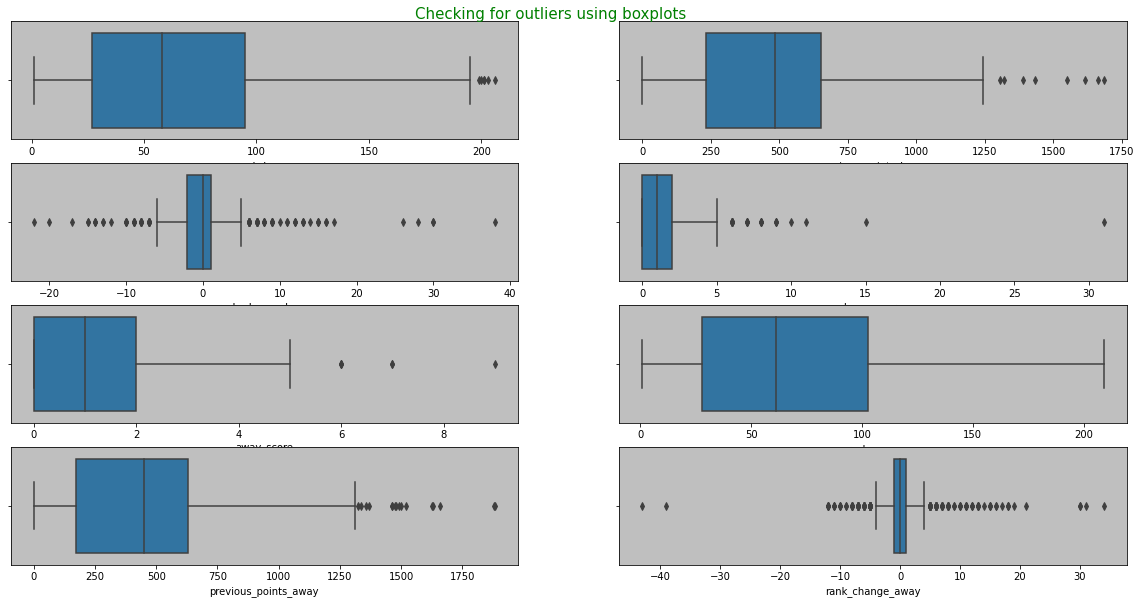

In [ ]:
# Plotting boxplots of the col_list columns to check for outliers
#
col_names = ['rank_home','previous_points_home','rank_change_home',
             'home_score', 'away_score', 'rank_away',
             'previous_points_away','rank_change_away']


fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y =0.9, color = 'green')
for ax, data, col_names in zip(axes.flatten(), df_merge, col_names):
  sns.boxplot(df_merge[col_names], ax = ax)
  ax.set_facecolor('0.75') 

There are outliers in the variables rank home, rank_change_away ,rank_change_home and home score. Will chose to keep them since they are needed to make prediction

# Chapter Four:Univariate Analysis

In [ ]:
df_merge.dtypes

rank_home                                int64
total_points_home                      float64
previous_points_home                     int64
rank_change_home                         int64
cur_year_avg_home                      float64
last_year_avg_home                     float64
last_year_avg_weighted_home            float64
two_year_ago_avg_home                  float64
two_year_ago_weighted_home             float64
three_year_ago_avg_home                float64
three_year_ago_weighted_home           float64
confederation                           object
date                            datetime64[ns]
year                                     int64
month                                    int64
home_team                               object
away_team                               object
home_score                             float64
away_score                             float64
tournament                              object
city                                    object
country      

In [ ]:
#Changing dtypes for variable
change_category = ['year', 'month']

for x in change_category:
  df_merge[x]=df_merge[x].astype('category')

#Rechecking the dtype
df_merge.dtypes

rank_home                                int64
total_points_home                      float64
previous_points_home                     int64
rank_change_home                         int64
cur_year_avg_home                      float64
last_year_avg_home                     float64
last_year_avg_weighted_home            float64
two_year_ago_avg_home                  float64
two_year_ago_weighted_home             float64
three_year_ago_avg_home                float64
three_year_ago_weighted_home           float64
confederation                           object
date                            datetime64[ns]
year                                  category
month                                 category
home_team                               object
away_team                               object
home_score                             float64
away_score                             float64
tournament                              object
city                                    object
country      

### Measures of central tendancy

In [ ]:
#finding median values of numerical columns
# create a list of all the numerical columns

col_names = ['rank_home','total_points_home','previous_points_home','rank_change_home','cur_year_avg_home','last_year_avg_home','last_year_avg_weighted_home',
             'two_year_ago_avg_home','two_year_ago_weighted_home','three_year_ago_avg_home','three_year_ago_weighted_home','home_score', 'away_score', 'rank_away',
             'total_points_away','previous_points_away','rank_change_away','cur_year_avg_away','last_year_avg_away','last_year_avg_weighted_away','two_year_ago_avg_away',
             'two_year_ago_weighted_away','three_year_ago_avg_away','three_year_ago_weighted_away']

# using a for loop to find the median value of all the numerical columns
for column in col_names:
  print('\n')
  print(column +':' + str(df_merge[column].median()))



rank_home:58.0


total_points_home:0.0


previous_points_home:485.0


rank_change_home:0.0


cur_year_avg_home:0.0


last_year_avg_home:0.0


last_year_avg_weighted_home:0.0


two_year_ago_avg_home:0.0


two_year_ago_weighted_home:0.0


three_year_ago_avg_home:0.0


three_year_ago_weighted_home:0.0


home_score:1.0


away_score:1.0


rank_away:61.0


total_points_away:0.0


previous_points_away:452.0


rank_change_away:0.0


cur_year_avg_away:0.0


last_year_avg_away:0.0


last_year_avg_weighted_away:0.0


two_year_ago_avg_away:0.0


two_year_ago_weighted_away:0.0


three_year_ago_avg_away:0.0


three_year_ago_weighted_away:0.0


In [ ]:
#finding mean values of numerical columns
# create a list of all the numerical columns

col_names = ['rank_home','total_points_home','previous_points_home','rank_change_home','cur_year_avg_home','last_year_avg_home','last_year_avg_weighted_home',
             'two_year_ago_avg_home','two_year_ago_weighted_home','three_year_ago_avg_home','three_year_ago_weighted_home','home_score', 'away_score', 'rank_away',
             'total_points_away','previous_points_away','rank_change_away','cur_year_avg_away','last_year_avg_away','last_year_avg_weighted_away','two_year_ago_avg_away',
             'two_year_ago_weighted_away','three_year_ago_avg_away','three_year_ago_weighted_away']

# using a for loop to find the mean value of all the numerical columns
for column in col_names:
  print('\n')
  print(column +':' + str(df_merge[column].mean()))



rank_home:65.54994259471871


total_points_home:38.54312284730194


previous_points_home:464.0275545350172


rank_change_home:-0.07921928817451206


cur_year_avg_home:19.919988518943743


last_year_avg_home:18.63354764638347


last_year_avg_weighted_home:9.316819747416766


two_year_ago_avg_home:19.001492537313432


two_year_ago_weighted_home:5.700482204362799


three_year_ago_avg_home:18.029437428243394


three_year_ago_weighted_home:3.6059012629161895


home_score:1.632606199770379


away_score:1.0045924225028702


rank_away:69.91848450057405


total_points_away:30.60692307692307


previous_points_away:448.6234213547646


rank_change_away:0.14006888633754305


cur_year_avg_away:15.08059701492537


last_year_avg_away:15.468989667049376


last_year_avg_weighted_away:7.734489092996559


two_year_ago_avg_away:15.843765786452352


two_year_ago_weighted_away:4.7531228473019524


three_year_ago_avg_away:15.193846153846154


three_year_ago_weighted_away:3.0387485648679684


In [ ]:
#finding mode values of numerical columns
# create a list of all the numerical columns

col_names = ['rank_home','total_points_home','previous_points_home','rank_change_home','cur_year_avg_home','last_year_avg_home','last_year_avg_weighted_home',
             'two_year_ago_avg_home','two_year_ago_weighted_home','three_year_ago_avg_home','three_year_ago_weighted_home','home_score', 'away_score', 'rank_away',
             'total_points_away','previous_points_away','rank_change_away','cur_year_avg_away','last_year_avg_away','last_year_avg_weighted_away','two_year_ago_avg_away',
             'two_year_ago_weighted_away','three_year_ago_avg_away','three_year_ago_weighted_away']

# using a for loop to find the mode value of all the numerical columns
for column in col_names:
  print('\n')
  print(column +':' + str(df_merge[column].mode()))



rank_home:0    33
dtype: int64


total_points_home:0    0.0
dtype: float64


previous_points_home:0    55
dtype: int64


rank_change_home:0    0
dtype: int64


cur_year_avg_home:0    0.0
dtype: float64


last_year_avg_home:0    0.0
dtype: float64


last_year_avg_weighted_home:0    0.0
dtype: float64


two_year_ago_avg_home:0    0.0
dtype: float64


two_year_ago_weighted_home:0    0.0
dtype: float64


three_year_ago_avg_home:0    0.0
dtype: float64


three_year_ago_weighted_home:0    0.0
dtype: float64


home_score:0    1.0
dtype: float64


away_score:0    0.0
dtype: float64


rank_away:0    20.0
1    30.0
2    36.0
dtype: float64


total_points_away:0    0.0
dtype: float64


previous_points_away:0    40.0
dtype: float64


rank_change_away:0    0.0
dtype: float64


cur_year_avg_away:0    0.0
dtype: float64


last_year_avg_away:0    0.0
dtype: float64


last_year_avg_weighted_away:0    0.0
dtype: float64


two_year_ago_avg_away:0    0.0
dtype: float64


two_year_ago_weighted_away:0    

### Measures of spread

In [ ]:
#calculating variance, standard deviations, skewness and kurtosis values for our columns of interest

for column in col_names:
  print('\n')
  print(column + ', variance: ' +str(df_merge[column].var()))
  print(column + ', std_deviation: ' +str(df_merge[column].std()))
  print(column + ', skewness: ' +str(df_merge[column].skew()))
  print(column + ', kurtosis: ' +str(df_merge[column].kurt()))



rank_home, variance: 2261.762732755319
rank_home, std_deviation: 47.5579933634223
rank_home, skewness: 0.753086815423578
rank_home, kurtosis: -0.14882953993501147


total_points_home, variance: 25912.932091845825
total_points_home, std_deviation: 160.97494243467156
total_points_home, skewness: 5.036747706537314
total_points_home, kurtosis: 27.22683876271758


previous_points_home, variance: 90925.46590654168
previous_points_home, std_deviation: 301.5384982163002
previous_points_home, skewness: 0.42507089642571966
previous_points_home, kurtosis: 0.36064044910707294


rank_change_home, variance: 20.070728585190853
rank_change_home, std_deviation: 4.480036672304241
rank_change_home, skewness: 1.7986633192753887
rank_change_home, kurtosis: 15.558337260890482


cur_year_avg_home, variance: 7134.928449769981
cur_year_avg_home, std_deviation: 84.4685056679114
cur_year_avg_home, skewness: 5.125153971243479
cur_year_avg_home, kurtosis: 28.573228399106906


last_year_avg_home, variance: 7365.4

In [ ]:
for column in df_merge:
    print(df_merge[column].value_counts())

33     14
27     13
15     12
8      12
12     12
       ..
146     1
151     1
153     1
155     1
91      1
Name: rank_home, Length: 181, dtype: int64
0.00       800
1053.99      1
241.10       1
445.66       1
1012.06      1
          ... 
329.32       1
347.41       1
145.51       1
74.62        1
1263.29      1
Name: total_points_home, Length: 72, dtype: int64
55      7
36      6
51      6
484     6
56      5
       ..
493     1
827     1
498     1
185     1
1434    1
Name: previous_points_home, Length: 527, dtype: int64
 0     231
-1     121
 1     103
-2      97
 2      59
-4      34
 3      31
-3      29
 4      25
-6      22
-5      19
 5      15
 6      11
 7       9
-7       8
-8       7
-9       5
 9       5
-10      4
 8       4
-14      3
 15      3
 13      3
 12      3
 30      2
-13      2
 16      2
-15      2
 11      2
-17      1
 10      1
 17      1
-20      1
 26      1
 28      1
 38      1
-12      1
 14      1
-22      1
Name: rank_change_home, dtype: int64
0.

In [ ]:
#Bar charts of categorical data
df_merge.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 956
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   rank_home                     871 non-null    int64         
 1   total_points_home             871 non-null    float64       
 2   previous_points_home          871 non-null    int64         
 3   rank_change_home              871 non-null    int64         
 4   cur_year_avg_home             871 non-null    float64       
 5   last_year_avg_home            871 non-null    float64       
 6   last_year_avg_weighted_home   871 non-null    float64       
 7   two_year_ago_avg_home         871 non-null    float64       
 8   two_year_ago_weighted_home    871 non-null    float64       
 9   three_year_ago_avg_home       871 non-null    float64       
 10  three_year_ago_weighted_home  871 non-null    float64       
 11  confederation                 87

### Categorical analysis

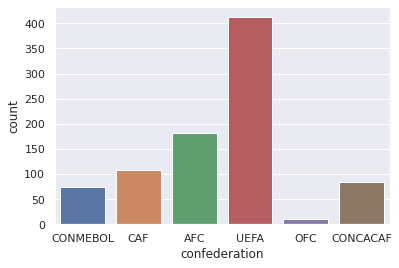

In [ ]:
#Viewing the confederation variable
sns.set(style="darkgrid")
ax = sns.countplot(x="confederation", data=df_merge)

plt.rcParams['figure.figsize']=(10,10)

UEFA is the most popular confederation from the data available in the dataset

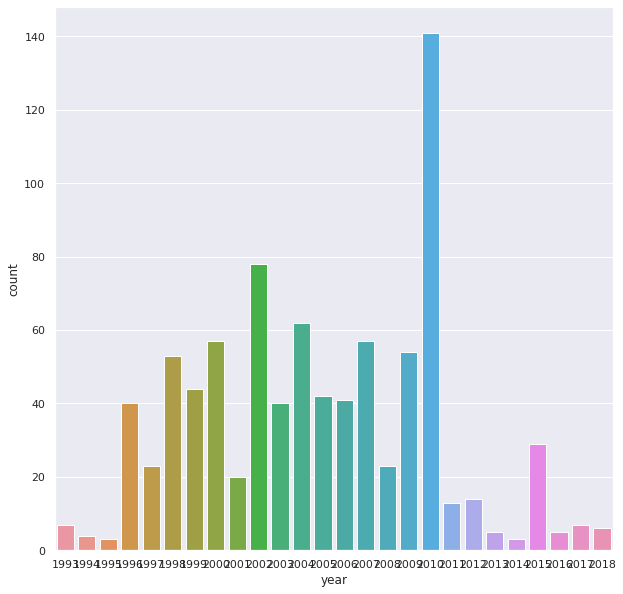

In [ ]:
#Displaying the year variable
sns.set(style="darkgrid")
ax = sns.countplot(x="year", data=df_merge)
plt.rcParams['figure.figsize']=(20,10)

2010 was the most played year by the teams in the dataset

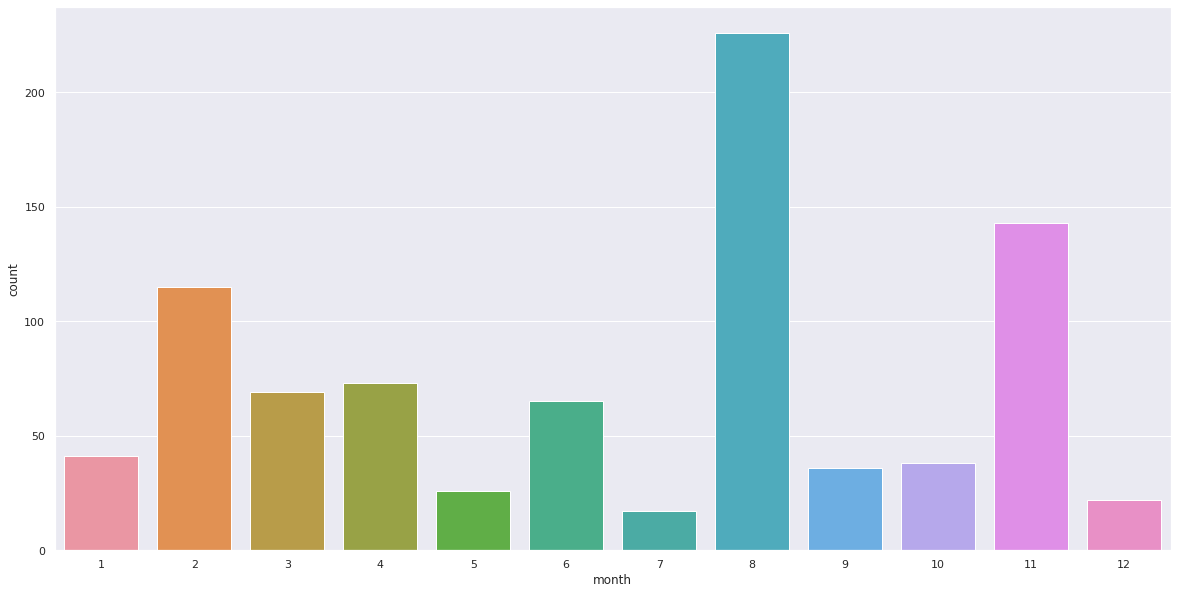

In [ ]:
#Displaying the month variable
sns.set(style="darkgrid")
ax = sns.countplot(x="month", data=df_merge)

plt.rcParams['figure.figsize']=(10,10)

Most games were played on the eighth month of the year

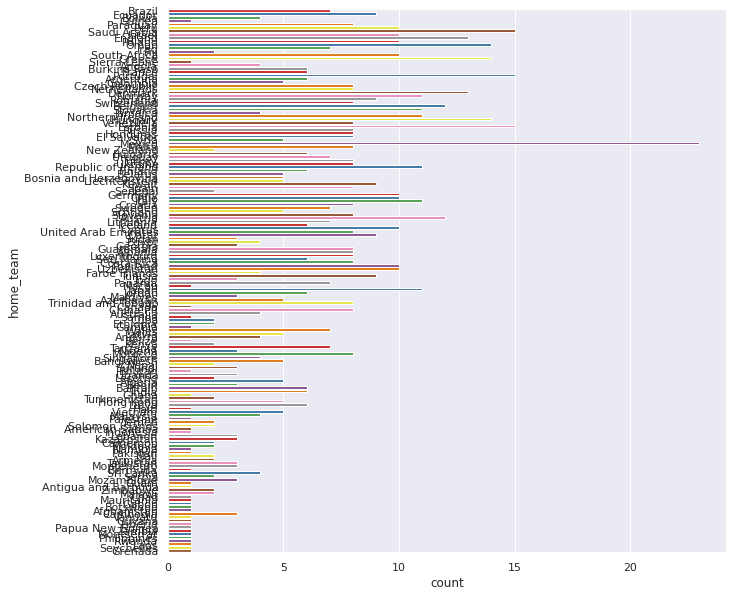

In [ ]:
#Displaying home teams in various matches
sns.set(style="darkgrid")
ax = sns.countplot(y="home_team", data=df_merge, palette='Set1')

plt.rcParams['figure.figsize']=(15,40)

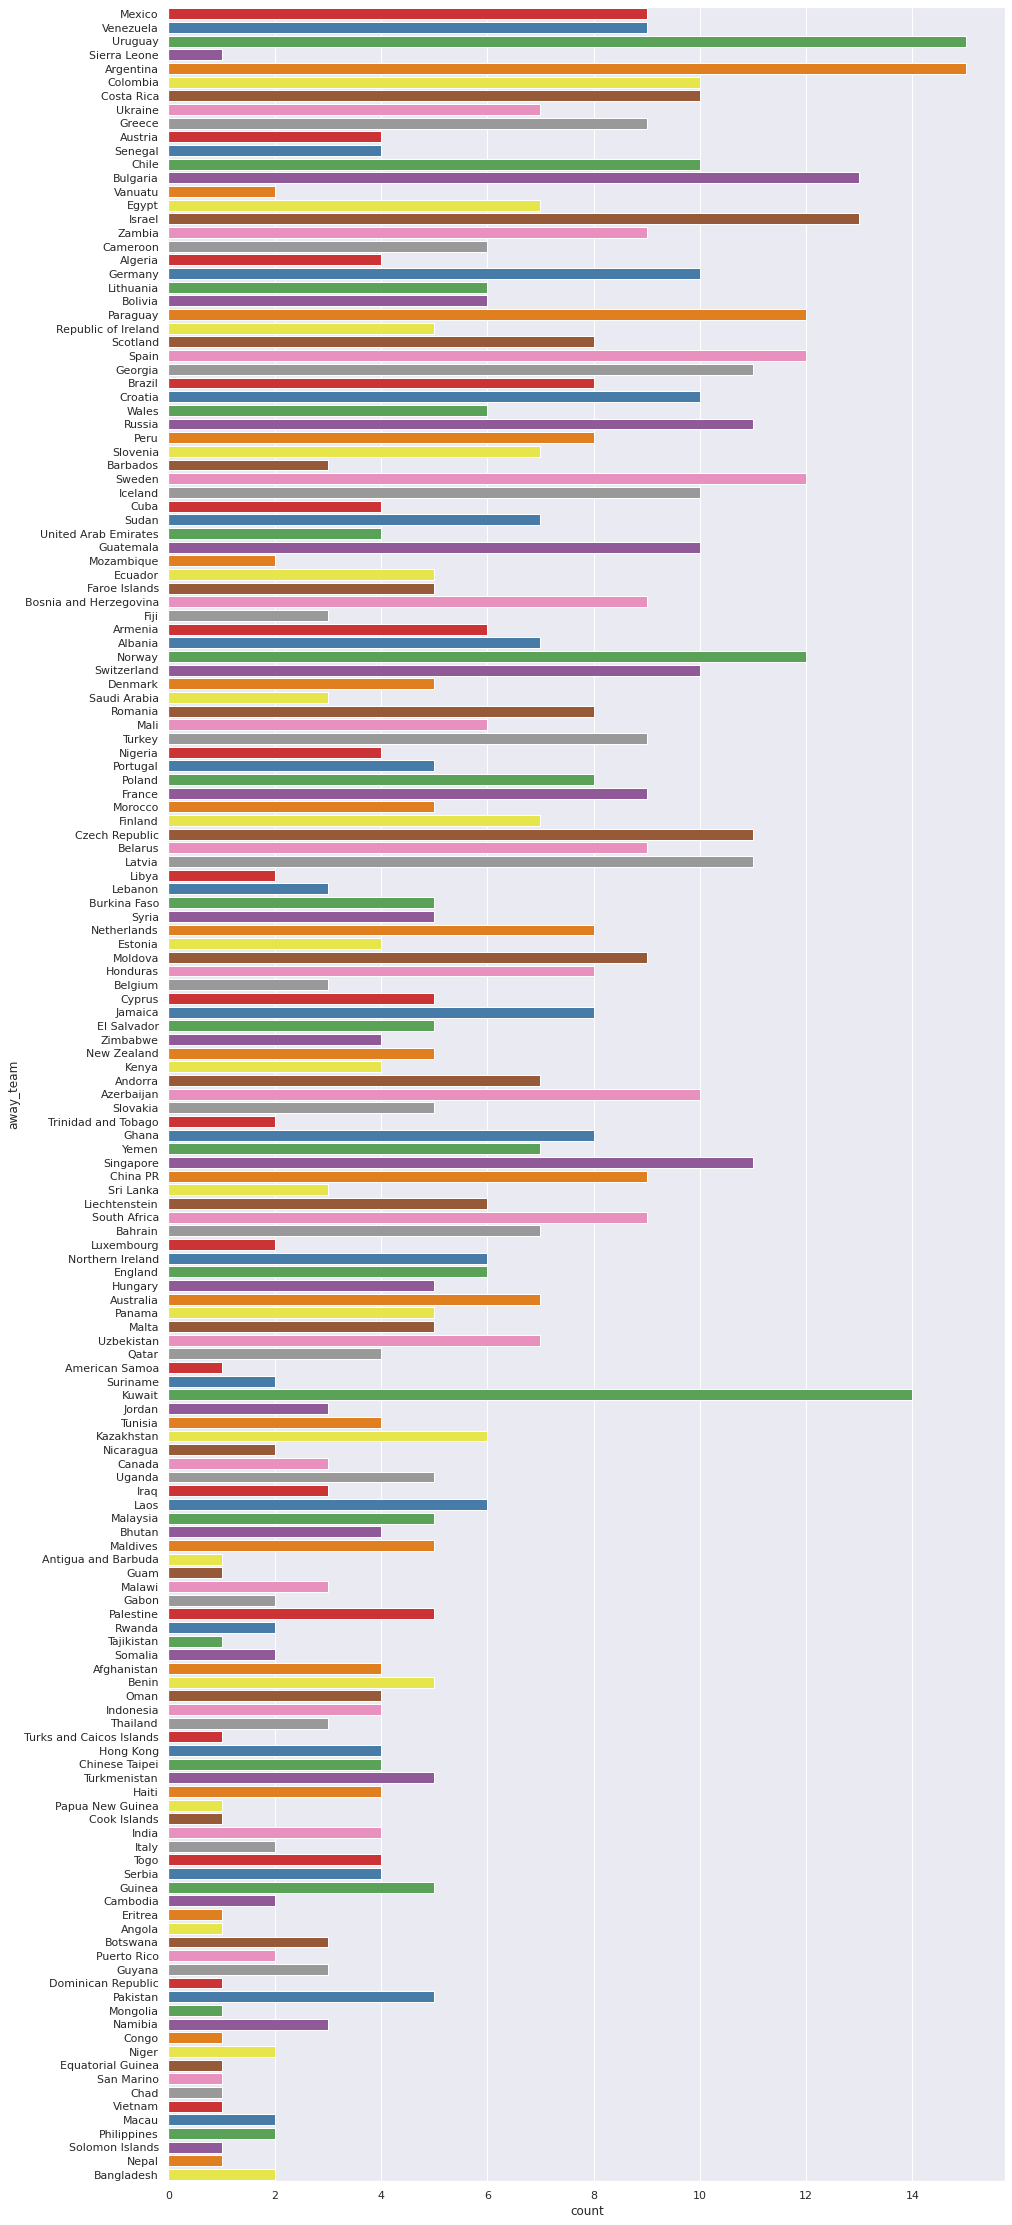

In [ ]:
#Displaying away team in various matches
sns.set(style="darkgrid")
ax = sns.countplot(y="away_team", data=df_merge, palette='Set1')

plt.rcParams['figure.figsize']=(15,50)

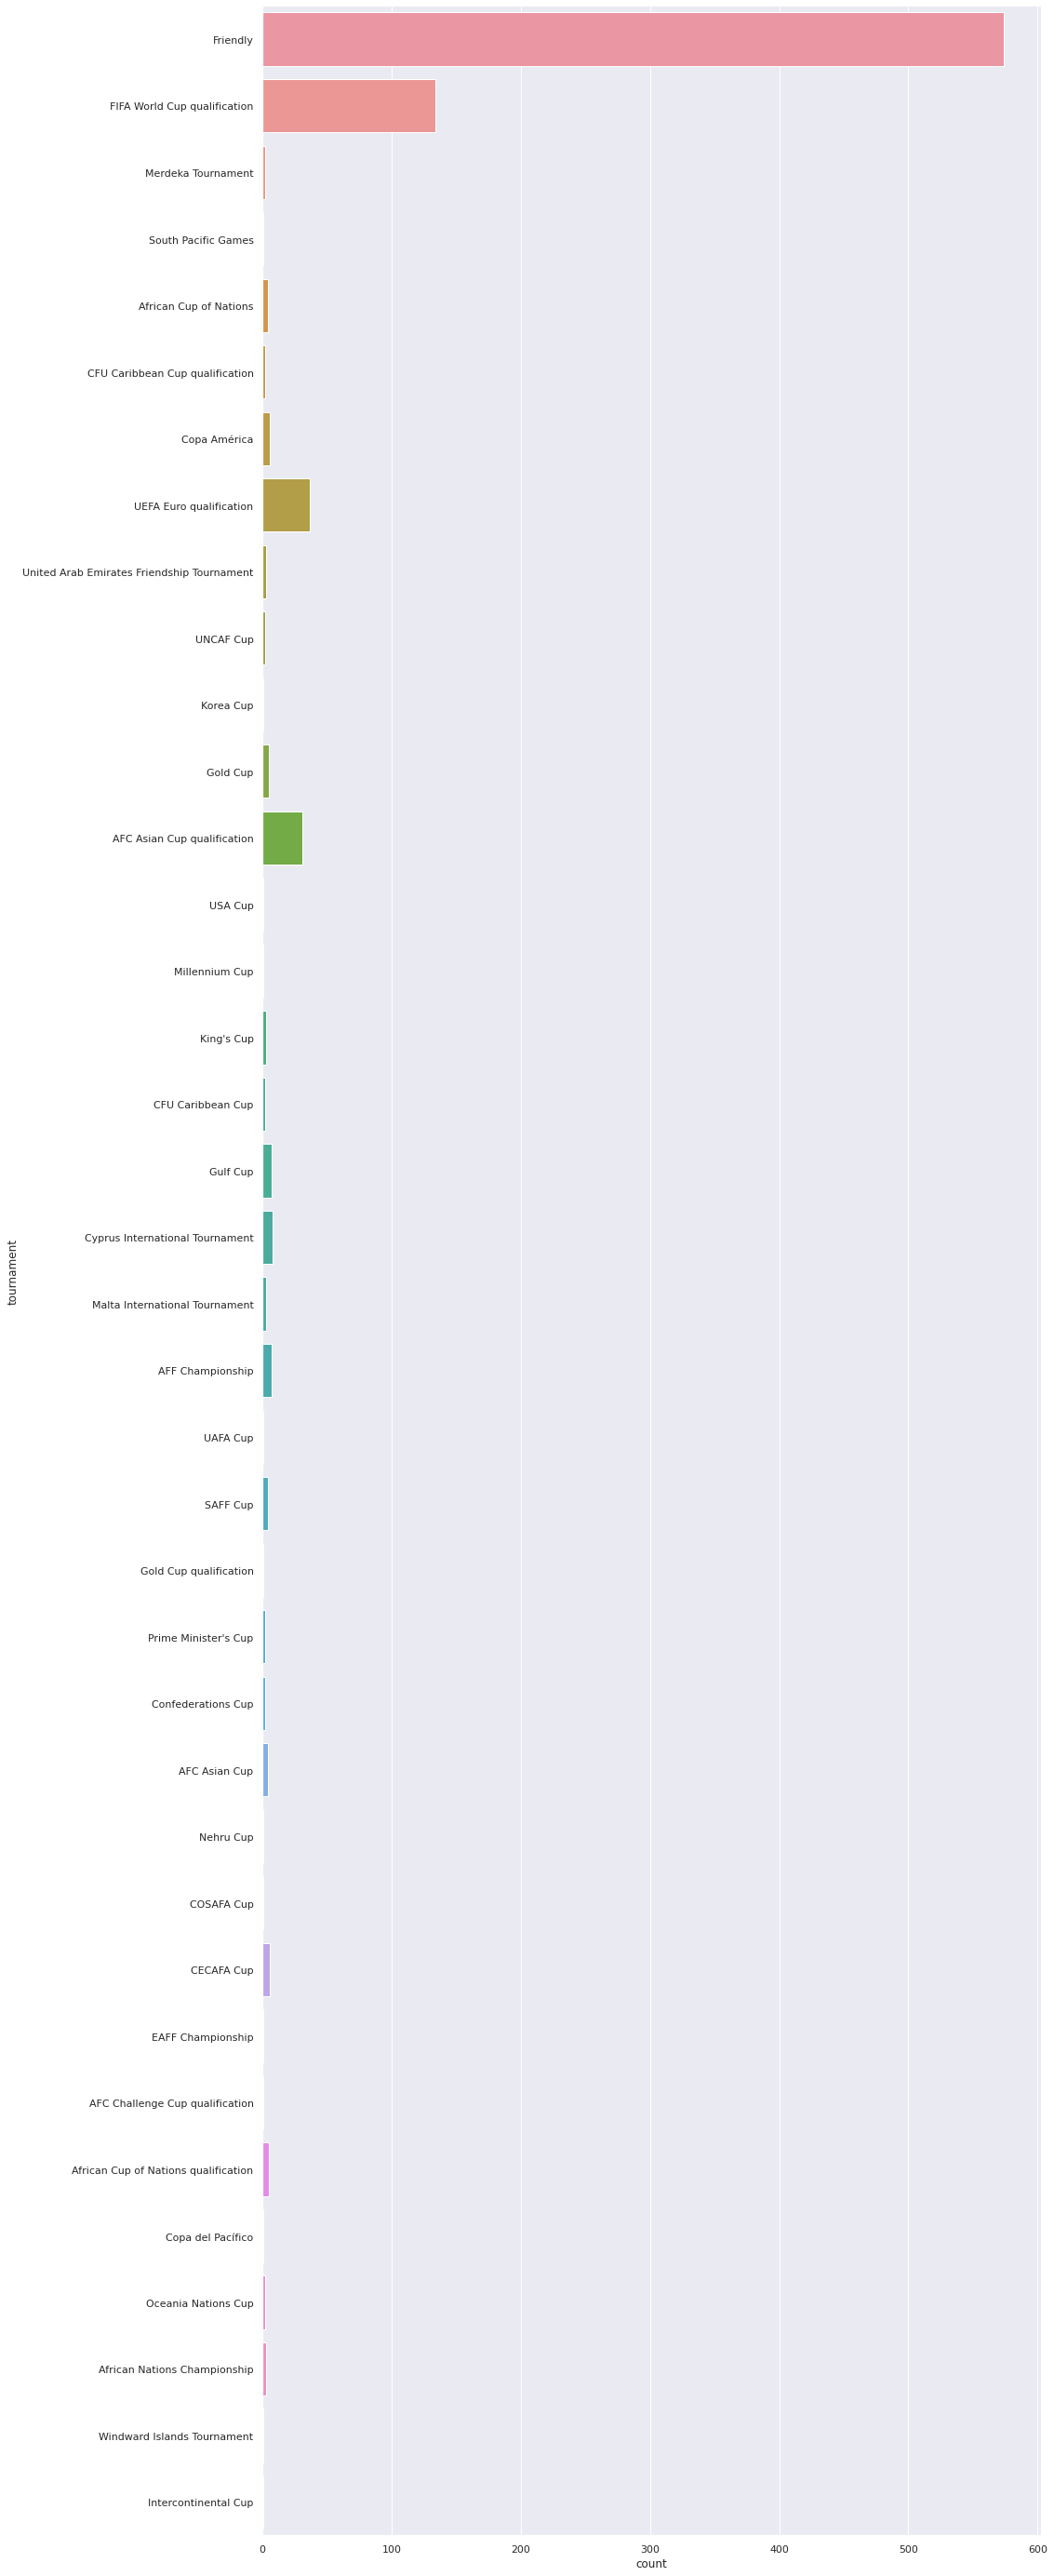

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(y="tournament", data=df_merge)

plt.rcParams['figure.figsize']=(35,20)

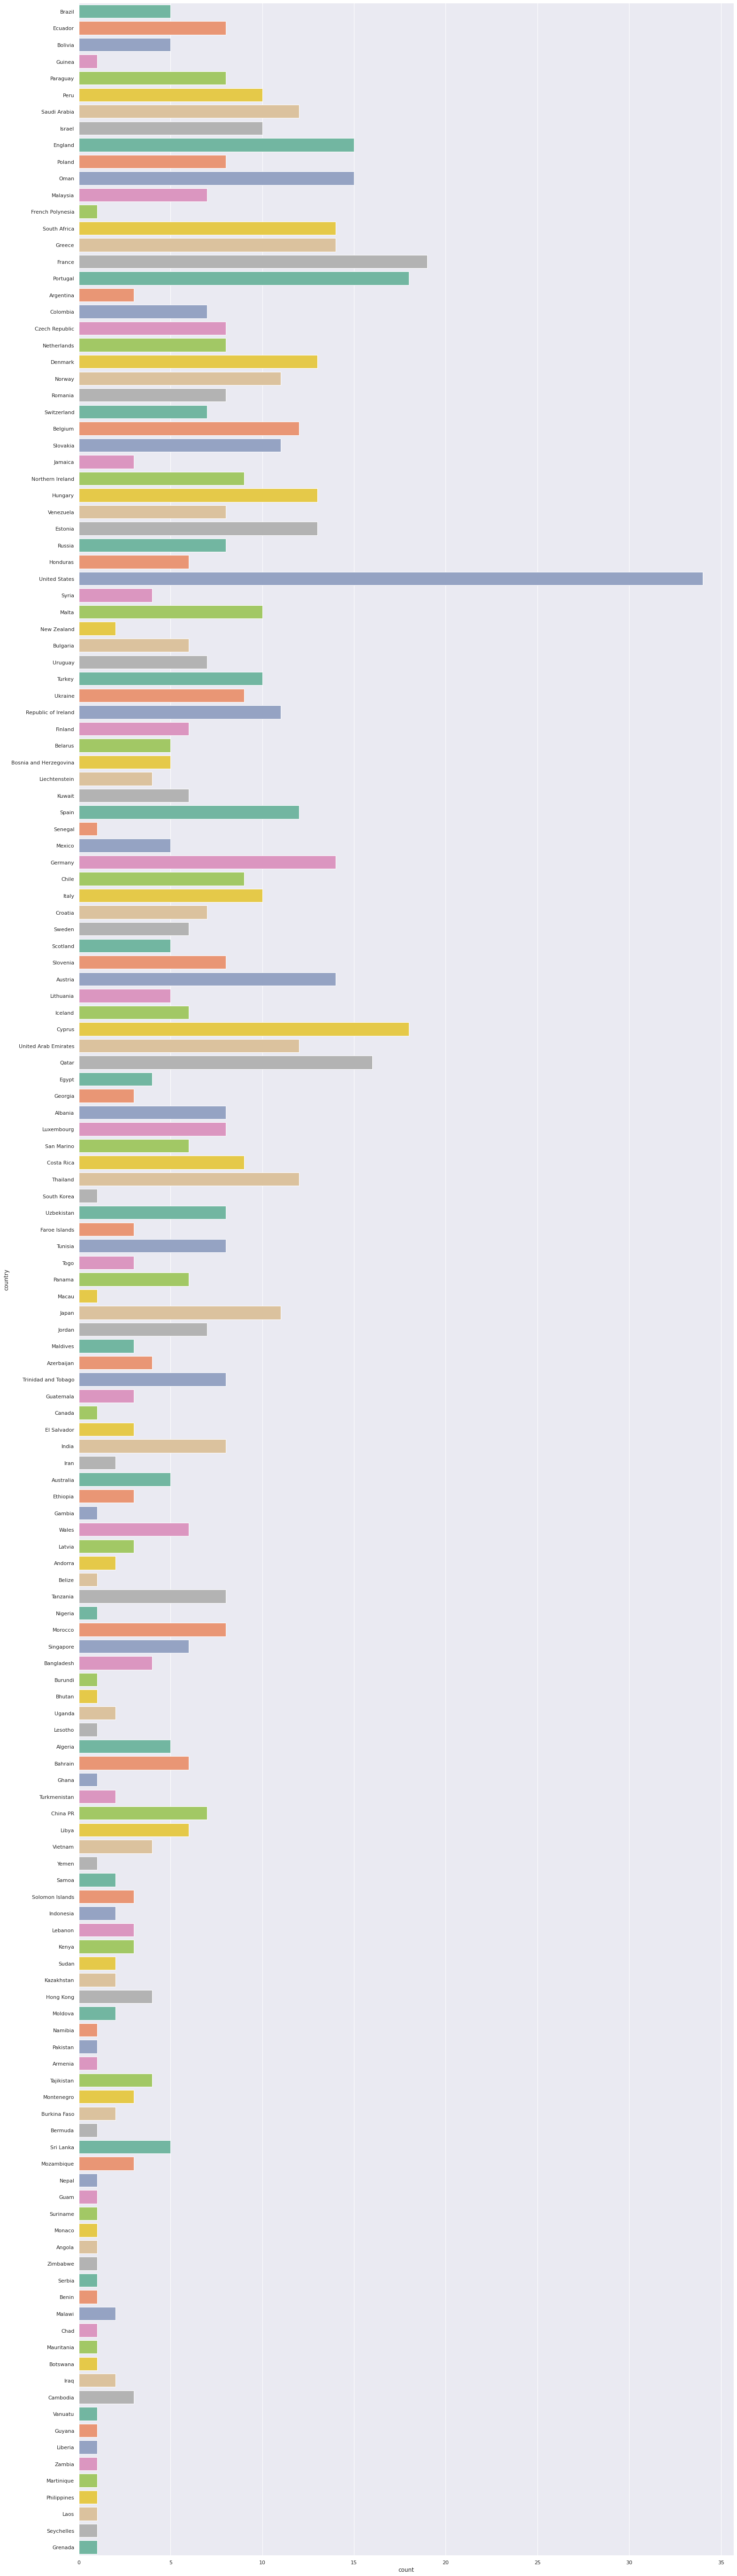

In [146]:
#Displaying the countries in the dataset
sns.set(style="darkgrid")
ax = sns.countplot(y="country", data=df_merge, palette='Set2')

plt.rcParams['figure.figsize']=(25,50)

USA and United Arab Emirates are the most countries that football was played in from the dataset

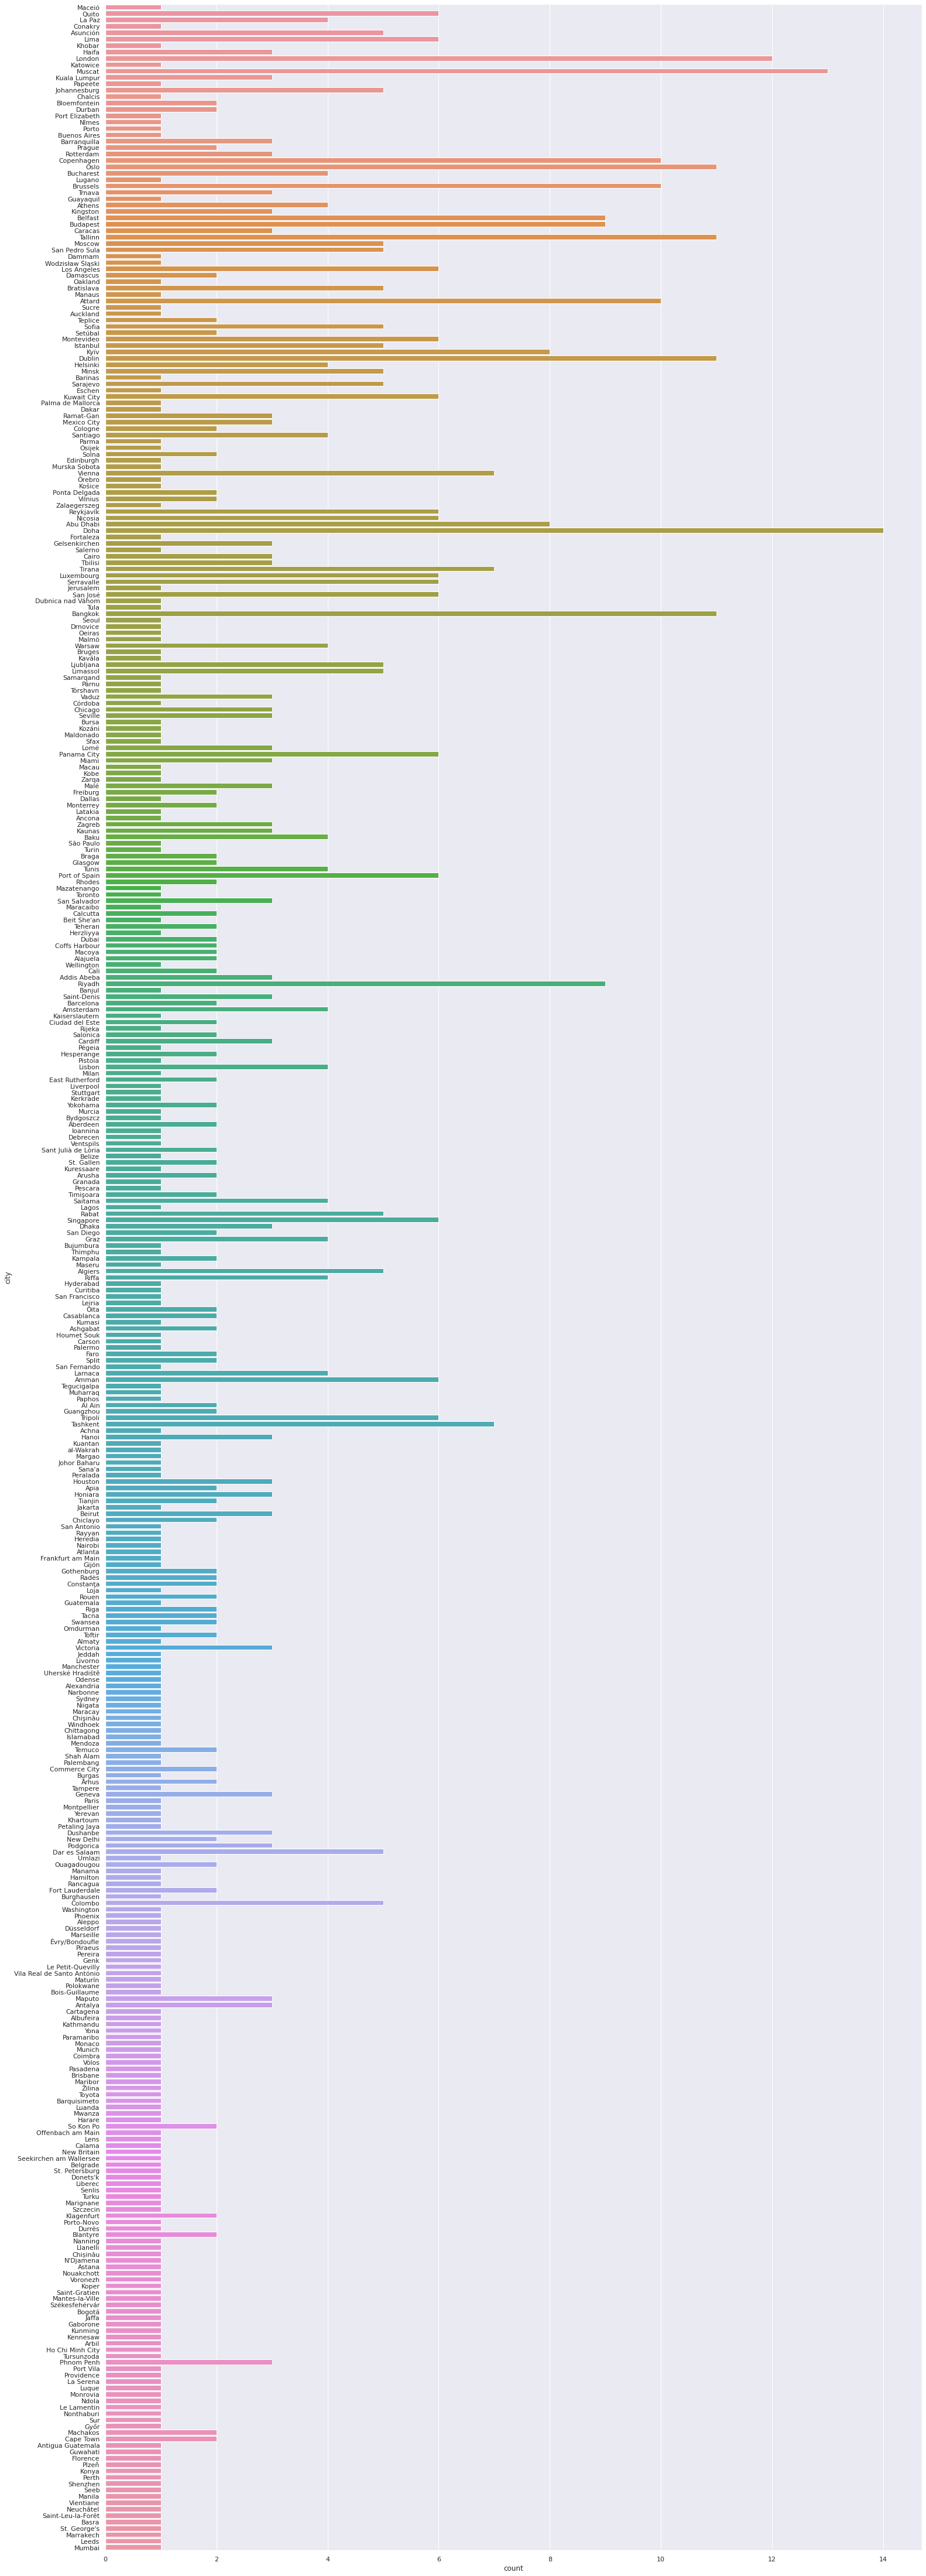

In [145]:
#List of cities
sns.set(style="darkgrid")
ax = sns.countplot(y="city", data=df_merge)

plt.rcParams['figure.figsize']=(25,100)

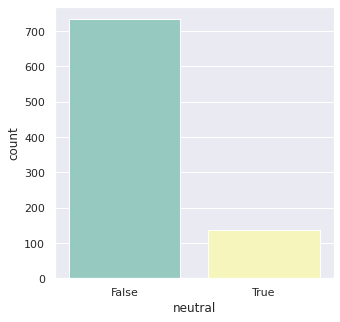

In [142]:
sns.set(style="darkgrid")
ax = sns.countplot(x="neutral", data=df_merge, palette='Set3')
plt.rcParams['figure.figsize']=(5,5)

### Numerical Analysis

In [140]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 956
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   rank_home                     871 non-null    int64         
 1   total_points_home             871 non-null    float64       
 2   previous_points_home          871 non-null    int64         
 3   rank_change_home              871 non-null    int64         
 4   cur_year_avg_home             871 non-null    float64       
 5   last_year_avg_home            871 non-null    float64       
 6   last_year_avg_weighted_home   871 non-null    float64       
 7   two_year_ago_avg_home         871 non-null    float64       
 8   two_year_ago_weighted_home    871 non-null    float64       
 9   three_year_ago_avg_home       871 non-null    float64       
 10  three_year_ago_weighted_home  871 non-null    float64       
 11  confederation                 87

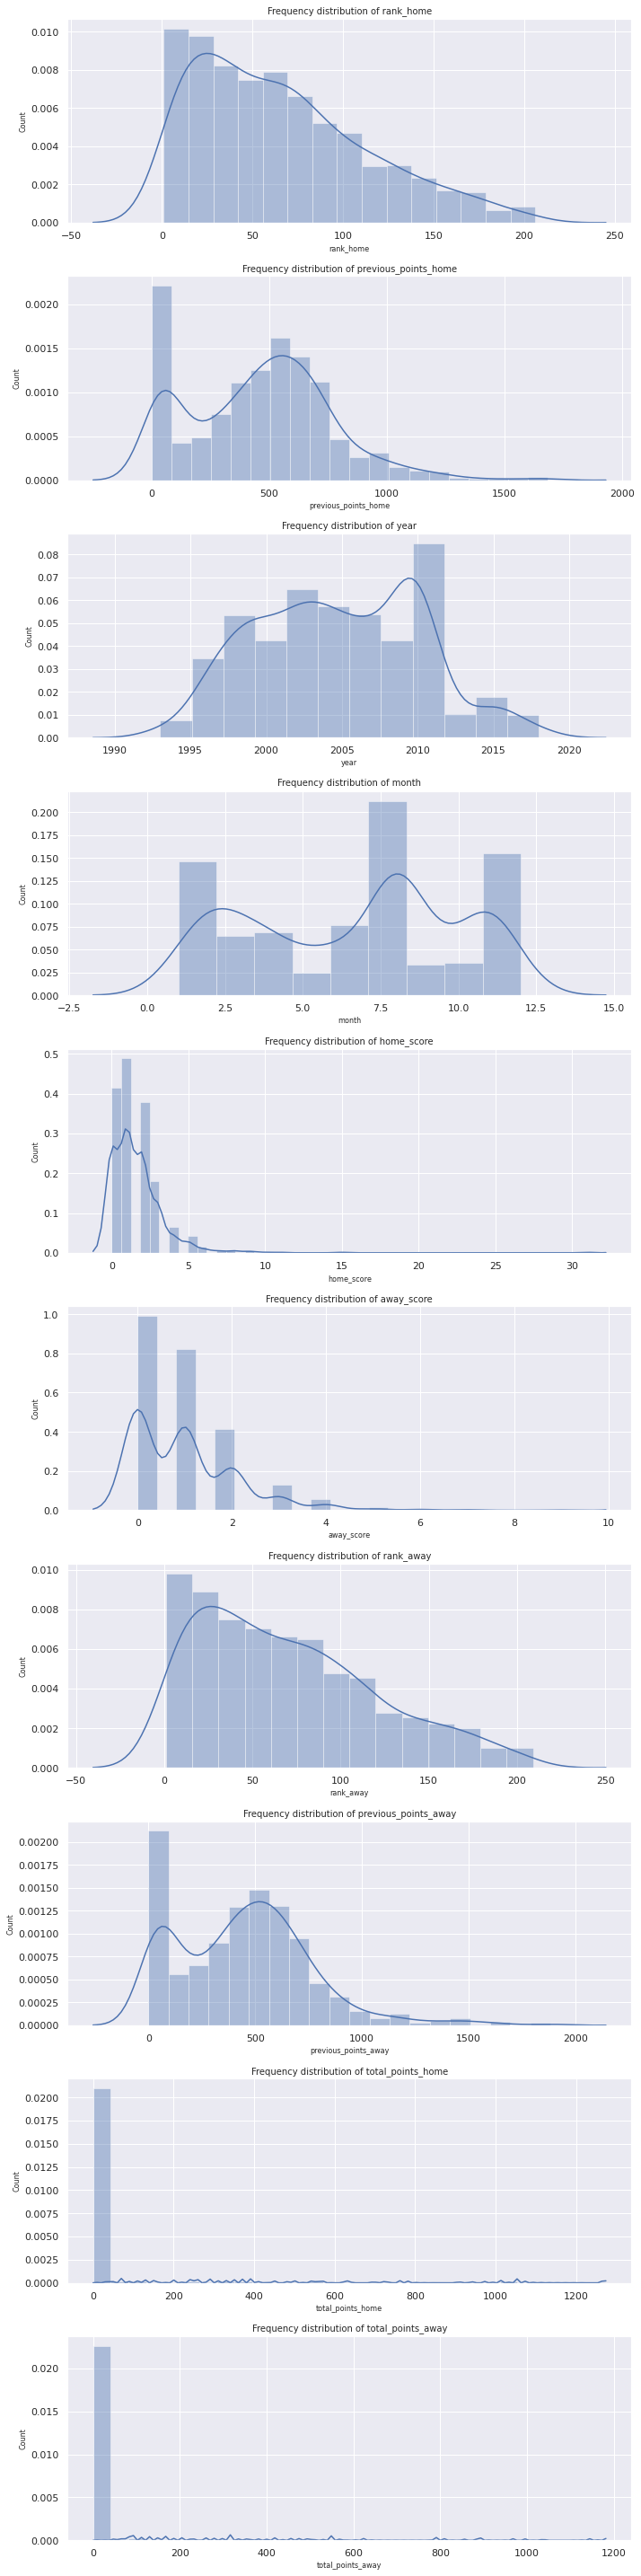

In [141]:
# Plotting distribution of numerical variables
col_names = ['rank_home', 'previous_points_home','year', 'month', 'home_score',
       'away_score', 'rank_away','previous_points_away', 'total_points_home', 'total_points_away']
fig, ax = plt.subplots(len(col_names), figsize=(10,40))

for i, col_val in enumerate(col_names):

    sns.distplot(df_merge[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

# Chapter Six: Option I - Polinomial Linear Regression

### Detecting multicollinearity

Multicollinearity in your training dataset should only reduce predictive performance in the test dataset if the covariance between variables in your training and test datasets is different. If the covariance structure (and consequently the multicollinearity) is similar in both training and test datasets

                      rank_home  ...  tournament
rank_home              1.000000  ...    0.023508
previous_points_home  -0.618886  ...   -0.017023
rank_change_home      -0.027498  ...    0.050505
away_score             0.143060  ...   -0.044414
rank_away              0.534618  ...    0.019961
previous_points_away  -0.321839  ...   -0.018370
rank_change_away       0.033777  ...    0.089414
tournament             0.023508  ...    1.000000

[8 rows x 8 columns]


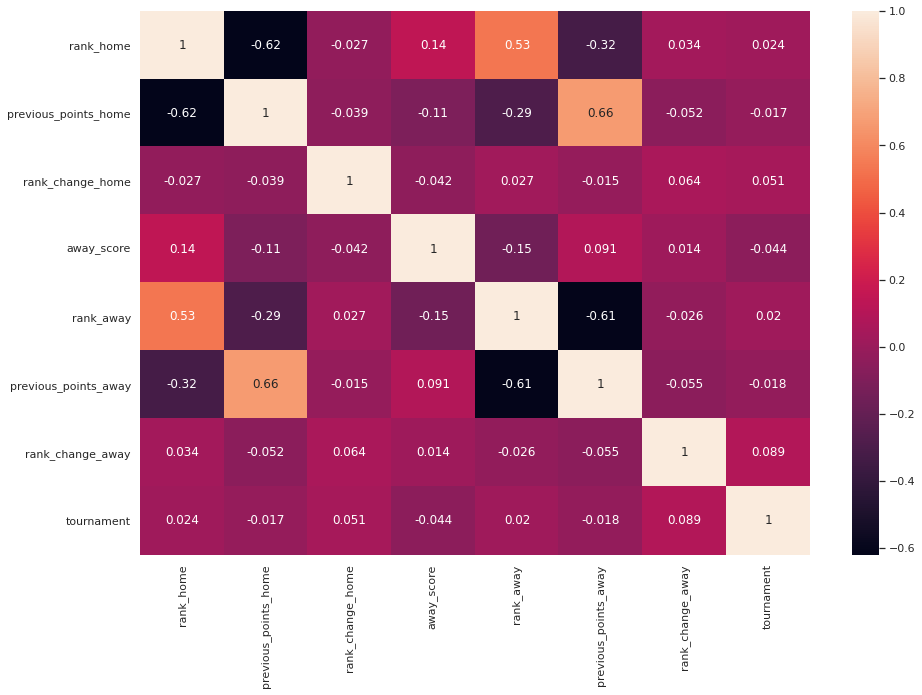

In [ ]:
#Creating a dataframe with needed  variables for home team score
#Creating a new dataframe with necesarry variables
#Tis is to help in understanding how our independent variables are correlated to each other
#Hot encoding the tournament column using pd.get_dummies function

df_merge['tournament'] = pd.get_dummies(df_merge['tournament'])


multi_df =['rank_home','previous_points_home','rank_change_home',
             'away_score', 'rank_away','previous_points_away','rank_change_away','tournament']

# Let's display the correlations between the variables
correlations = df_merge[multi_df].corr()
print(correlations)
#Plotting heatmap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlations, annot=True, ax=ax);

The tabe above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself.
We will further compute the VIF score for each variable. This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the *inverse* of the matrix above.

In [ ]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,rank_home,previous_points_home,rank_change_home,away_score,rank_away,previous_points_away,rank_change_away,tournament
rank_home,3.470720,2.954816,0.240592,-0.337555,-2.497989,-2.345311,-0.165696,-0.036838
previous_points_home,2.954816,4.470328,0.278549,0.013475,-2.450606,-3.519541,-0.142595,-0.009821
rank_change_home,0.240592,0.278549,1.027754,0.025593,-0.212730,-0.228905,-0.073543,-0.045067
away_score,-0.337555,0.013475,0.025593,1.106037,0.347299,-0.004843,-0.000410,0.049010
rank_away,-2.497989,-2.450606,-0.212730,0.347299,3.476116,2.921010,0.216719,0.008069
previous_points_away,-2.345311,-3.519541,-0.228905,-0.004843,2.921010,4.374781,0.227086,0.008320
rank_change_away,-0.165696,-0.142595,-0.073543,-0.000410,0.216719,0.227086,1.028795,-0.086979
tournament,-0.036838,-0.009821,-0.045067,0.049010,0.008069,0.008320,-0.086979,1.012920


The VIF score for each variable is found alongside the downwards sloping diagonal: rank_home has 3.47, previos_points_home has 4.47, rank_change_home has 1.02, away_score has 1.1, rank_away has 3.4, previous_points_away has 4.3, rank_change_away has 1.02 and finally tournament has 1.01.
In the next step we will drop variables nearing 5 i.e previous_points_home and previous_points_away. This is to see if the VIF scores will improve

In [ ]:
revised =df_merge[multi_df].drop(columns=['previous_points_home', 'previous_points_away'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,rank_home,rank_change_home,away_score,rank_away,rank_change_away,tournament
rank_home,1.517410,0.056362,-0.346394,-0.866460,-0.070086,-0.030340
rank_change_home,0.056362,1.010340,0.024787,-0.054096,-0.063971,-0.044451
away_score,-0.346394,0.024787,1.105975,0.351121,-0.000393,0.049038
rank_away,-0.866460,-0.054096,0.351121,1.519599,0.067558,0.002322
rank_change_away,-0.070086,-0.063971,-0.000393,0.067558,1.016027,-0.087334
tournament,-0.030340,-0.044451,0.049038,0.002322,-0.087334,1.012899


All scores dropped, but the rank_change_home, away_score, rank_change_away and tournament  did quite a bit, indicating that they were colinear with the dropped variables.

                      rank_home  ...  tournament
rank_home              1.000000  ...   -0.023508
previous_points_home  -0.618886  ...    0.017023
rank_change_home      -0.027498  ...   -0.050505
away_score             0.143060  ...    0.044414
rank_away              0.534618  ...   -0.019961
previous_points_away  -0.321839  ...    0.018370
rank_change_away       0.033777  ...   -0.089414
tournament            -0.023508  ...    1.000000

[8 rows x 8 columns]


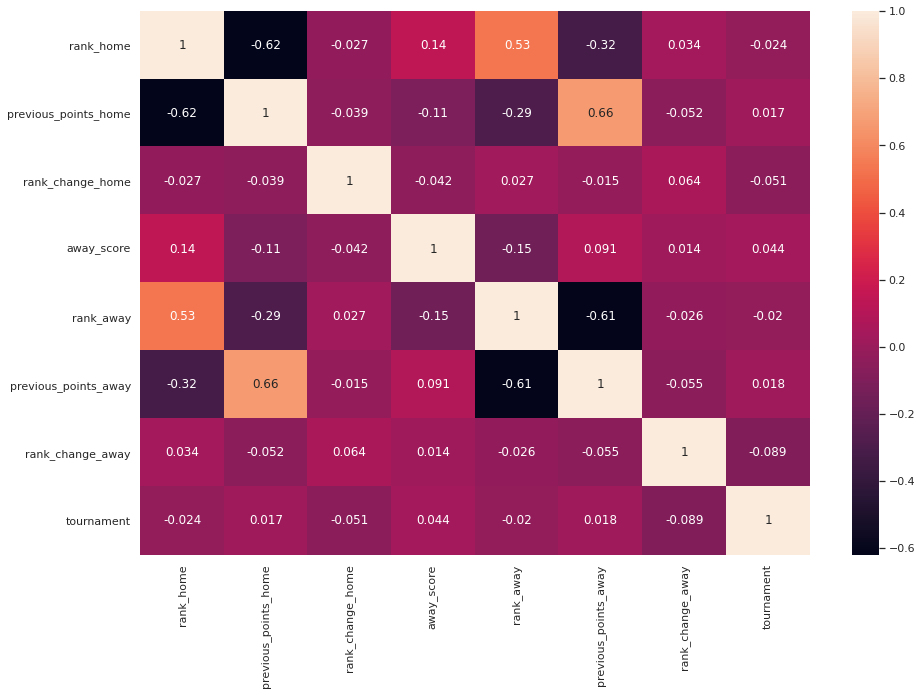

In [ ]:
#Creating a dataframe with needed  variables for away team score
#Creating a new dataframe with necesarry variables
#Tis is to help in understanding how our independent variables are correlated to each other

df_merge['tournament'] = pd.get_dummies(df_merge['tournament'])


multi_df_1 =['rank_home','previous_points_home','rank_change_home',
             'home_score', 'rank_away','previous_points_away','rank_change_away','tournament']

# Let's display the correlations between the variables
correlations = df_merge[multi_df].corr()
print(correlations)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlations, annot=True, ax=ax);

The tabe above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself.
We will further compute the VIF score for each variable. This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the *inverse* of the matrix above.

In [ ]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,rank_home,previous_points_home,rank_change_home,away_score,rank_away,previous_points_away,rank_change_away,tournament
rank_home,3.470720,2.954816,0.240592,-0.337555,-2.497989,-2.345311,-0.165696,0.036838
previous_points_home,2.954816,4.470328,0.278549,0.013475,-2.450606,-3.519541,-0.142595,0.009821
rank_change_home,0.240592,0.278549,1.027754,0.025593,-0.212730,-0.228905,-0.073543,0.045067
away_score,-0.337555,0.013475,0.025593,1.106037,0.347299,-0.004843,-0.000410,-0.049010
rank_away,-2.497989,-2.450606,-0.212730,0.347299,3.476116,2.921010,0.216719,-0.008069
previous_points_away,-2.345311,-3.519541,-0.228905,-0.004843,2.921010,4.374781,0.227086,-0.008320
rank_change_away,-0.165696,-0.142595,-0.073543,-0.000410,0.216719,0.227086,1.028795,0.086979
tournament,0.036838,0.009821,0.045067,-0.049010,-0.008069,-0.008320,0.086979,1.012920


The VIF score for each variable is found alongside the downwards sloping diagonal: rank_home has 3.52, previos_points_home has 4.48, rank_change_home has 1.03, away_score has 1.2, rank_away has 3.6, previous_points_away has 4.3, rank_change_away has 1.03 and finally tournament has 1.01.
In the next step we will drop variables nearing 5 i.e previous_points_home and previous_points_away. This is to see if the VIF scores will improve

In [ ]:
revised_2 =df_merge[multi_df].drop(columns=['previous_points_home', 'previous_points_away'])

correlations = revised_2.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,rank_home,rank_change_home,away_score,rank_away,rank_change_away,tournament
rank_home,1.517410,0.056362,-0.346394,-0.866460,-0.070086,0.030340
rank_change_home,0.056362,1.010340,0.024787,-0.054096,-0.063971,0.044451
away_score,-0.346394,0.024787,1.105975,0.351121,-0.000393,-0.049038
rank_away,-0.866460,-0.054096,0.351121,1.519599,0.067558,-0.002322
rank_change_away,-0.070086,-0.063971,-0.000393,0.067558,1.016027,0.087334
tournament,0.030340,0.044451,-0.049038,-0.002322,0.087334,1.012899


All scores dropped, but the rank_change_home, away_score, rank_change_away and tournament  did quite a bit, indicating that they were colinear with the dropped variables.

In [129]:
#Splitting data into X and y
#X contains dependent variables
#y contains independent variables = revised
X = df_merge['home_score'].values
y = revised

y = np.array(y)



print(X)
print(y)

[ 1.  5.  3.  1.  1.  0.  1.  1.  5.  3.  2.  6.  1.  3.  0.  2.  0.  3.
  1.  3.  1.  4.  3.  1.  2.  0.  2.  0.  5.  2.  0.  2.  0.  0.  4.  2.
  2.  1.  0.  0.  0.  2.  2.  0.  1.  1.  2.  0.  1.  0.  3.  1.  1.  0.
  1.  2.  5.  3.  2.  1.  2.  3.  1.  6.  1.  0.  0.  1.  1.  0.  1.  0.
  3.  0.  2.  1.  1.  1.  4.  0.  1.  0.  1.  3.  2.  3.  1.  0.  4.  0.
  1.  2.  1.  0.  1.  1.  5.  1.  1.  1.  0.  2.  1.  0.  2.  0.  2.  4.
  4.  3.  1.  5.  1.  1.  0.  2.  5.  1.  2.  2.  1.  2.  2.  3.  2.  2.
  1.  0.  0.  0.  2.  2.  9.  1.  3.  2.  1.  2.  2.  0.  2.  2.  3.  1.
  4.  0.  0.  1.  1.  1.  3.  3.  5.  1.  2.  2.  0.  5.  2.  0.  0.  0.
  2.  0.  0.  0.  3.  1.  0.  1.  0.  2.  3.  2.  1.  2.  2.  2.  4.  0.
  0.  1.  1.  8.  4.  0.  2.  5.  1.  2.  0.  0.  1.  1.  3.  0.  2.  0.
  3.  2.  1.  1.  0.  1.  2.  2.  0.  0.  1.  1.  1.  2.  5.  0.  0.  2.
  1.  0.  1.  3.  0.  1.  2.  0.  0.  5.  3.  2.  1.  0.  0.  2.  2.  2.
  0.  0.  1.  1.  1.  0.  1.  1. 31.  1.  4.  2.  3

In [130]:
#Splitting data into X and y
#B contains dependent variables
#d contains independent variables = revised

B = df_merge['home_score'].values
d = revised_2


print(B)
print(d)


[ 1.  5.  3.  1.  1.  0.  1.  1.  5.  3.  2.  6.  1.  3.  0.  2.  0.  3.
  1.  3.  1.  4.  3.  1.  2.  0.  2.  0.  5.  2.  0.  2.  0.  0.  4.  2.
  2.  1.  0.  0.  0.  2.  2.  0.  1.  1.  2.  0.  1.  0.  3.  1.  1.  0.
  1.  2.  5.  3.  2.  1.  2.  3.  1.  6.  1.  0.  0.  1.  1.  0.  1.  0.
  3.  0.  2.  1.  1.  1.  4.  0.  1.  0.  1.  3.  2.  3.  1.  0.  4.  0.
  1.  2.  1.  0.  1.  1.  5.  1.  1.  1.  0.  2.  1.  0.  2.  0.  2.  4.
  4.  3.  1.  5.  1.  1.  0.  2.  5.  1.  2.  2.  1.  2.  2.  3.  2.  2.
  1.  0.  0.  0.  2.  2.  9.  1.  3.  2.  1.  2.  2.  0.  2.  2.  3.  1.
  4.  0.  0.  1.  1.  1.  3.  3.  5.  1.  2.  2.  0.  5.  2.  0.  0.  0.
  2.  0.  0.  0.  3.  1.  0.  1.  0.  2.  3.  2.  1.  2.  2.  2.  4.  0.
  0.  1.  1.  8.  4.  0.  2.  5.  1.  2.  0.  0.  1.  1.  3.  0.  2.  0.
  3.  2.  1.  1.  0.  1.  2.  2.  0.  0.  1.  1.  1.  2.  5.  0.  0.  2.
  1.  0.  1.  3.  0.  1.  2.  0.  0.  5.  3.  2.  1.  0.  0.  2.  2.  2.
  0.  0.  1.  1.  1.  0.  1.  1. 31.  1.  4.  2.  3

### Train/Test split of train Dataset for home score

In [131]:
score_train, score_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(score_train.shape, y_train.shape)
print(score_test.shape, y_test.shape)

(696,) (696, 6)
(175,) (175, 6)


### Train/Test split of train Dataset for away score

In [ ]:
a_score_train, a_score_test, d_train, d_test = train_test_split(B, d, test_size=0.2, random_state=0)
print(a_score_train.shape, d_train.shape)
print(a_score_test.shape, d_test.shape)

(696,) (696, 6)
(175,) (175, 6)


### Computing RMSE for the model 

In [132]:
# Train using 80% of the data.
score_train, score_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(y_train, score_train)

# assess the accuraccy of the model
score_pred = regressor.predict(y_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(score_test, score_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(score_test, score_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(score_test, score_pred)))

Mean Absolute Error: 0.9966944773630209
Mean Squared Error: 1.7188502918185837
Root Mean Squared Error: 1.3110493094535323


### Cross validation using K-fold

In [135]:
from sklearn.model_selection import KFold
folds = KFold(n_splits=10)
# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(y)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(y):
  print('\nTraining model ' + str(count))
  
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  
  
  X_train, X_test =X[train_index], X[test_index]
  y_train, y_test =y[train_index], y[test_index]
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(y_train, X_train)
  
  # assess the accuraccy of the model
  X_pred = regressor.predict(y_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(X_test, X_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 1.4039077640881252

Training model 2
Model 2 Root Mean Squared Error: 1.5304132681765243

Training model 3
Model 3 Root Mean Squared Error: 3.2621559391277652

Training model 4
Model 4 Root Mean Squared Error: 1.3459935289079805

Training model 5
Model 5 Root Mean Squared Error: 1.8083292907550894

Training model 6
Model 6 Root Mean Squared Error: 1.3634238261738274

Training model 7
Model 7 Root Mean Squared Error: 1.2888868918133487

Training model 8
Model 8 Root Mean Squared Error: 1.2645916771270647

Training model 9
Model 9 Root Mean Squared Error: 1.3113456656937015

Training model 10
Model 10 Root Mean Squared Error: 2.0295295102098856


Training model 1 and 9 have less RMSE than the rest, this could mean that the other models have more outliers in them as compared to training model 1 and 9
.The average RSME is 3.599334928857461e-15 above. The K-fold validation has improved the Root Mean Squared Error of our model to 1.5598726832052663e-15

In [136]:
np.mean(RMSES)

1.6608577362073311

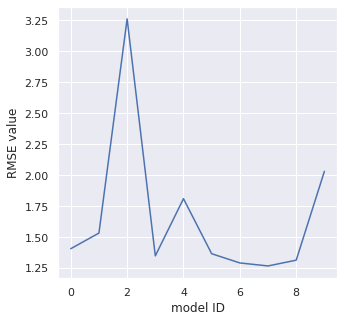

In [137]:
#Plotting RMSE accress the 10 models

plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

### Residual Plots and heteroskedasticity 

In [ ]:
regressor = LinearRegression()
regressor.fit(d_train, a_score_train)

# This is our prediction for admission based on our model
a_score_predict = regressor.predict(d_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(a_score_predict,a_score_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.1640836212678454

Our mean on the other hand is close to 0, indicating that we tend to be fairly correct

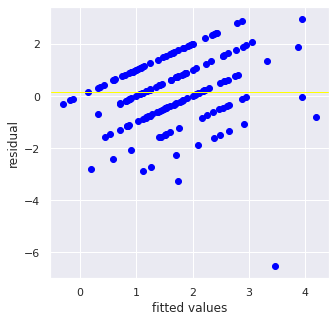

In [ ]:
plt.scatter(a_score_predict, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='yellow', linewidth=1)
plt.show()

This does not look too bad: our residuals are centered around a mean that is very close to 0, a non-random pattern supports a nonlinear model. Let's be thorough though, and perform a heteroskedasticity test.

For this we will use [bartlett's test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda357.htm). The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(a_score_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(a_score_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


308.7274405725314
the variances are homogeneous!


The test establishes the null hypothesis that the variance is equal for all our datapoints

###Polynomial Regression - model 1:
Predict how many goals home team scores

In [ ]:
# Data-set is divided into test data and train data based on test_size variable.

X_train, X_test, y_train, y_test = train_test_split(
                      X, y, test_size=0.2, random_state=0)
#Linear regression
# Model is predicted with Linear Regression. Fit the training data-set and predict the values of the test data-set.
model = linear_model.LinearRegression()
model = model.fit(y_train, X_train)
predicted_data = model.predict(y_test)
predicted_data = np.round_(predicted_data)

# Calculate the Mean Squared Error between the predicted data and the actual data.
print ('linear regression', mean_squared_error(X_test,predicted_data))

# Print the predicted data.
print (predicted_data)


# Fit the training data into polynomial model of degree 4 (appropriate value as per the data-set).
model = PolynomialFeatures(degree= 8)
y_ = model.fit_transform(y)
y_test_ = model.fit_transform(y_test)
# Fit and predict the obtained polynomial model into linear regression.
lg = LinearRegression()
lg.fit(y_,X)
predicted_score = lg.predict(y_test_)
predicted_score = np.round_(predicted_score)



# Display the mean squared error between the predicted data and test data.
print ('polynomial regression',mean_squared_error(X_test,predicted_score))
# Display the values of predicted_data
print (predicted_score)


linear regression 1.8628571428571428
[ 1.  1.  2.  2.  1.  2.  2.  2.  1.  1.  1.  1.  1.  3.  2.  2.  2.  3.
  2.  2.  2.  1.  1.  1.  1.  2.  1.  2.  1.  2.  3.  2.  1.  3.  2.  2.
  1.  3.  1.  1.  2.  2.  2.  2.  1.  3.  1.  2.  3.  1.  2.  2.  1.  2.
 -0.  2.  2.  2.  1.  1.  1.  2.  0.  2.  1.  0.  2.  2.  1.  3.  3.  0.
  1.  2.  2.  2.  2.  1.  2.  2.  3.  1.  1.  1.  1.  1.  1.  2.  2.  2.
  2.  1.  3.  1.  3.  1.  2.  0.  2.  3.  1.  2.  3.  3.  1.  1.  2.  3.
  1.  3.  1.  2.  1.  1.  2.  1.  0.  2.  3.  1.  4.  0.  1.  1.  3.  1.
  1.  2.  2.  1.  2.  3.  1. -0.  2.  1.  2.  1.  2.  3.  1.  4.  1.  2.
  1.  2.  1.  3.  2.  3.  1.  2.  4.  0.  1.  4.  2.  2.  2.  2.  2.  1.
 -0.  2.  2.  2.  1.  1.  1.  1.  2.  2.  2.  3.  2.]
polynomial regression 0.18285714285714286
[ 2.  2.  2.  2.  2.  1.  3.  1.  1.  2.  0. -0.  1. -0.  1.  2.  2.  3.
  4.  0.  2.  2.  0.  1.  1. -0.  2.  1. -0.  1.  0.  2.  2.  1.  1.  5.
  0.  4.  2.  1.  3.  1. -0.  3.  0.  2.  1.  0.  0.  1.  2.  2.

There is a significant decrease in the mean standard error between linear regression (2.406) and polynomial regression (0.145)

###Polynomial Regression - model 2:
Predict how many goals away team scores

In [126]:

#Splitting data into X and y
#X contains dependent variables
#y contains independent variables = revised
X = df_merge['away_score']
y = revised_2


print(X)
print(y)

0      1.0
1      0.0
3      1.0
4      0.0
5      3.0
      ... 
952    0.0
953    0.0
954    0.0
955    2.0
956    2.0
Name: away_score, Length: 871, dtype: float64
     rank_home  rank_change_home  ...  rank_change_away  tournament
0            8                -5  ...              11.0           1
1           35                30  ...              31.0           1
3           59                28  ...              -6.0           1
4           65                -2  ...              -7.0           1
5           67                 1  ...               5.0           1
..         ...               ...  ...               ...         ...
952          4                 0  ...              -2.0           1
953         12                 1  ...               2.0           1
954         14                 3  ...              -7.0           1
955         22                 0  ...               3.0           1
956         97                 0  ...              13.0           1

[871 rows x 6 co

In [127]:
# Data-set is divided into test data and train data based on test_size variable.

X_train, X_test, y_train, y_test = train_test_split(
                      X, y, test_size=0.2, random_state=0)
#Linear regression
# Model is predicted with Linear Regression. Fit the training data-set and predict the values of the test data-set.
model = linear_model.LinearRegression()
model = model.fit(y_train, X_train)
predicted_data = model.predict(y_test)
predicted_data = np.round_(predicted_data)

# Calculate the Mean Squared Error between the predicted data and the actual data.
print ('linear regression', mean_squared_error(X_test,predicted_data))

# Print the predicted data.
print (predicted_data)


# Fit the training data into polynomial model of degree 7 (appropriate value as per the data-set).
model = PolynomialFeatures(degree= 7)
y_ = model.fit_transform(y)
y_test_ = model.fit_transform(y_test)
# Fit and predict the obtained polynomial model into linear regression.
lg = LinearRegression()
lg.fit(y_,X)
predicted_score = lg.predict(y_test_)
predicted_score = np.round_(predicted_score)



# Display the mean squared error between the predicted data and test data.
print ('polynomial regression',mean_squared_error(X_test,predicted_score))
# Display the values of predicted_data
print (predicted_score)

linear regression 0.0
[ 2.  0.  1.  1.  0. -0.  1.  1.  2.  1.  3.  0.  1.  1.  1. -0. -0.  0.
  1.  0.  2.  0.  5.  2.  0.  2.  2.  1.  3.  1. -0. -0.  1.  1. -0. -0.
  2.  2.  1.  2.  1.  3. -0. -0.  4. -0.  2.  1. -0.  0.  2. -0.  1. -0.
  2. -0.  1.  1.  1.  1.  0.  1.  2.  0.  1.  4.  0.  0.  0.  1. -0.  0.
  1. -0.  0.  2.  0.  1.  0.  2.  2.  1.  0.  0.  1.  0.  0.  2.  2.  2.
  1.  2. -0.  2. -0.  2. -0.  0.  0. -0.  2.  1. -0. -0.  3.  4. -0.  2.
  5. -0.  2.  2.  1.  1. -0.  1.  3. -0. -0.  2. -0.  0.  1.  2. -0.  2.
  0.  1.  0.  0.  0. -0.  0.  2.  2.  1.  2.  0.  0. -0.  1. -0. -0.  2.
  1.  1.  1.  2.  4. -0.  2.  0. -0.  4.  0. -0.  1. -0. -0.  1.  2.  1.
  3. -0.  0.  0.  2.  3.  1.  0.  2. -0.  1. -0.  0.]
polynomial regression 0.005714285714285714
[ 2. -0.  1.  1. -0.  0.  1.  1.  2.  1.  3. -0.  1.  1.  1. -0.  0.  0.
  1.  0.  2.  0.  5.  2. -0.  2.  2.  1.  3.  1. -0. -0.  1.  1.  0. -0.
  2.  2.  1.  2.  1.  3.  0. -0.  4.  0.  2.  1. -0.  0.  2.  0.  1.  0.
  2. 

  There is a significant decrease in the mean standard error between linear regression (1.149) and polynomial regression (0.163)

# Chapter Seven: Option II - Logistic Regression 

For this task figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 956
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   rank_home                     871 non-null    int64         
 1   total_points_home             871 non-null    float64       
 2   previous_points_home          871 non-null    int64         
 3   rank_change_home              871 non-null    int64         
 4   cur_year_avg_home             871 non-null    float64       
 5   last_year_avg_home            871 non-null    float64       
 6   last_year_avg_weighted_home   871 non-null    float64       
 7   two_year_ago_avg_home         871 non-null    float64       
 8   two_year_ago_weighted_home    871 non-null    float64       
 9   three_year_ago_avg_home       871 non-null    float64       
 10  three_year_ago_weighted_home  871 non-null    float64       
 11  confederation                 87

In [ ]:
#Feature engineering
#Creating a new dataframe with relevant columns
#Creating new column:status
df_merge['status'] = df_merge['home_score'] - df_merge['away_score']

def get_score():
  outcome = []
  df_merge['status'] 
  for x in df_merge['status']:
    if x>0:
      outcome.append('win')
    elif x<0:
      outcome.append('loss')
    else:
      outcome.append('draw')
  df_merge['outcome']= outcome

get_score()

#Encoding home_team and away_team

le = preprocessing.LabelEncoder()
#Encoding the home team column
le.fit(df_merge['home_team'])
df_merge['home_team'] = le.transform(df_merge['home_team'])
#Encoding the away team column
le.fit(df_merge['away_team'])
df_merge['away_team'] = le.transform(df_merge['away_team'])

col =['home_team', 'home_score','away_team','away_score', 'year', 'rank_home', 'rank_away', 'tournament','status', 'outcome']

df_new = df_merge[col]
df_new.head(5)




,home_team,home_score,away_team,away_score,year,rank_home,rank_away,tournament,status,outcome
0,23,1.0,90,1.0,1993,8,14.0,1,0.0,draw
1,40,5.0,153,0.0,1993,35,94.0,1,5.0,win
3,20,3.0,150,1.0,1993,59,22.0,1,2.0,win
4,59,1.0,125,0.0,1993,65,86.0,1,1.0,win
5,111,1.0,7,3.0,1993,67,5.0,1,-2.0,loss


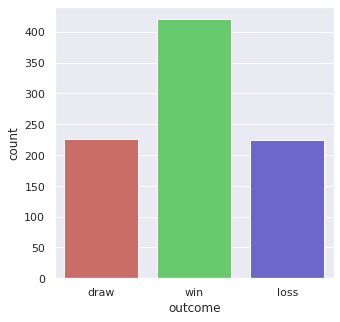

In [ ]:
sns.countplot(x='outcome',data=df_new, palette='hls')

From the above diagram there are more wins for home team as compared to losses and draws.

In [ ]:
# Splitting our dataset
#Creating our variables a and b
a = df_new.drop("outcome",axis=1)
b = df_new["outcome"]

print(a)
print(b)


X_train, X_test, y_train, y_test = train_test_split(a, b, test_size = .3, random_state=25)

     home_team  home_score  away_team  ...  rank_away tournament  status
0           23         1.0         90  ...       14.0          1     0.0
1           40         5.0        153  ...       94.0          1     5.0
3           20         3.0        150  ...       22.0          1     2.0
4           59         1.0        125  ...       86.0          1     1.0
5          111         1.0          7  ...        5.0          1    -2.0
..         ...         ...        ...  ...        ...        ...     ...
952        115         3.0          2  ...       66.0          1     3.0
953         43         2.0         35  ...       23.0          1     2.0
954        151         3.0        151  ...       95.0          1     3.0
955         65         2.0         56  ...       47.0          1     0.0
956         66         1.0         98  ...      120.0          1    -1.0

[871 rows x 9 columns]
0      draw
1       win
3       win
4       win
5      loss
       ... 
952     win
953     win
954 

In [ ]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)


In [ ]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 57,   6,   3],
       [  5,  67,   0],
       [  2,   0, 122]])

This means that 57,67 and 122 of the predicted results match the y_test, while 6,3,5, and 2 number of result don't match the predicted results

### Grid Search

In [ ]:
# Scaling our Data
# ---
# 
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [ ]:
# Training and Cross Validation
# ---
# 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [ ]:
# Training and Cross Validation
# Next, to implement cross validation, the cross_val_score method 
# of the sklearn.model_selection library can be used. 
# The cross_val_score returns the accuracy for all the folds. 
# Values for 4 parameters are required to be passed to the cross_val_score class. 
# The first parameter is estimator which basically specifies 
# the algorithm that you want to use for cross validation. 
# The second and third parameters, X and y, contain the X_train and y_train data i.e. features and labels. 
# Finally the number of folds is passed to the cv parameter as shown in the following code

from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)


In [ ]:
# Printing the accuracies returned for five folds 
# by the cross_val_score method by calling print on all_accuracies
# ---
#
print(all_accuracies.mean())

1.0


In [112]:
# We create a dictionary of all the parameters and their corresponding 
# set of values that you want to test for best performance. 
# The name of the dictionary items corresponds to the parameter name 
# and the value corresponds to the list of values for the parameter.
# As shown grid_param dictionary with three parameters n_estimators, criterion, and bootstrap. 
# The parameter values that we want to try out are passed in the list. 
# For instance, in the above script we want to find which value 
# (out of 100, 300, 500, 800, and 1000) provides the highest accuracy. 
# Similarly, we want to find which value results in the 
# highest performance for the criterion parameter: "gini" or "entropy"? 
# The Grid Search algorithm basically tries all possible combinations 
# of parameter values and returns the combination with the highest accuracy. 
# For instance, in the above case the algorithm will check 20 combinations (5 x 2 x 2 = 20).
# ---
# 
param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}


In [113]:
# Once the parameter dictionary is created, the next step 
# is to create an instance of the GridSearchCV class. 
# We need to pass values for the estimator parameter, 
# which basically is the algorithm that you want to execute. 
# The param_grid parameter takes the parameter dictionary 
# that we just created as parameter, the scoring parameter 
# takes the performance metrics, the cv parameter corresponds 
# to number of folds, which is 5 in our case, and finally 
# the n_jobs parameter refers to the number of CPU's that we want to use for execution. 
# A value of -1 for n_jobs parameter means that use all available computing power.
# ---
# 
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [114]:
# Calling to fit method
# Once the GridSearchCV class is initialized, we call the fit method of the class 
# and pass it the training and test set
#  
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [115]:
# Step 4: Checking the parameters that return the highest accuracy
# --- 
# To do so, we print the sr.best_params_ attribute of the GridSearchCV object, as shown below:
# ---
# 
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}


This shows that highest accuracy is achieved when n_estimators are 100, under the parameter criteria gini and the bootstrap is true

In [116]:
# Finding the obtained accuracy
# 
best_result = gd_sr.best_score_
print(best_result)

1.0


# Chapter Eight : Challenging and conclusion



There is a significant decrease in the mean standard error between linear regression (2.406) and polynomial regression (0.145), when the line is fitted to curve number 8





For the logistic regression: This means that 57,67 and 122 of the predicted results match the y_test, while 6,3,5, and 2 number of result don't match the predicted results

Accuracy achieved for grid search is 100 percent, this shows presence of false positives. Our model could further be improved by adding more variables or using it would be good to test values for other parameters 
of Random Forest algorithm, such as max_features, max_depth, max_leaf_nodes, etc.